In [1]:
# imports
import os
import pandas as pd
import numpy as np
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# input data
dataset_path = '/mnt/HDD/rnaqanet_data/rnaquadataset/preprocessing/features'

def tally_items(directory: str) -> int:
    count = 0
    for i in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, i)):
            count += 1
    return count

tally_items(dataset_path)

17678

In [3]:
# file extensions
file_extensions = ['.ang', '.atr', '.bon', '_all.tor']

In [4]:
info = {}
column_labels = {'val':[]}

### Filetype: .ang ###


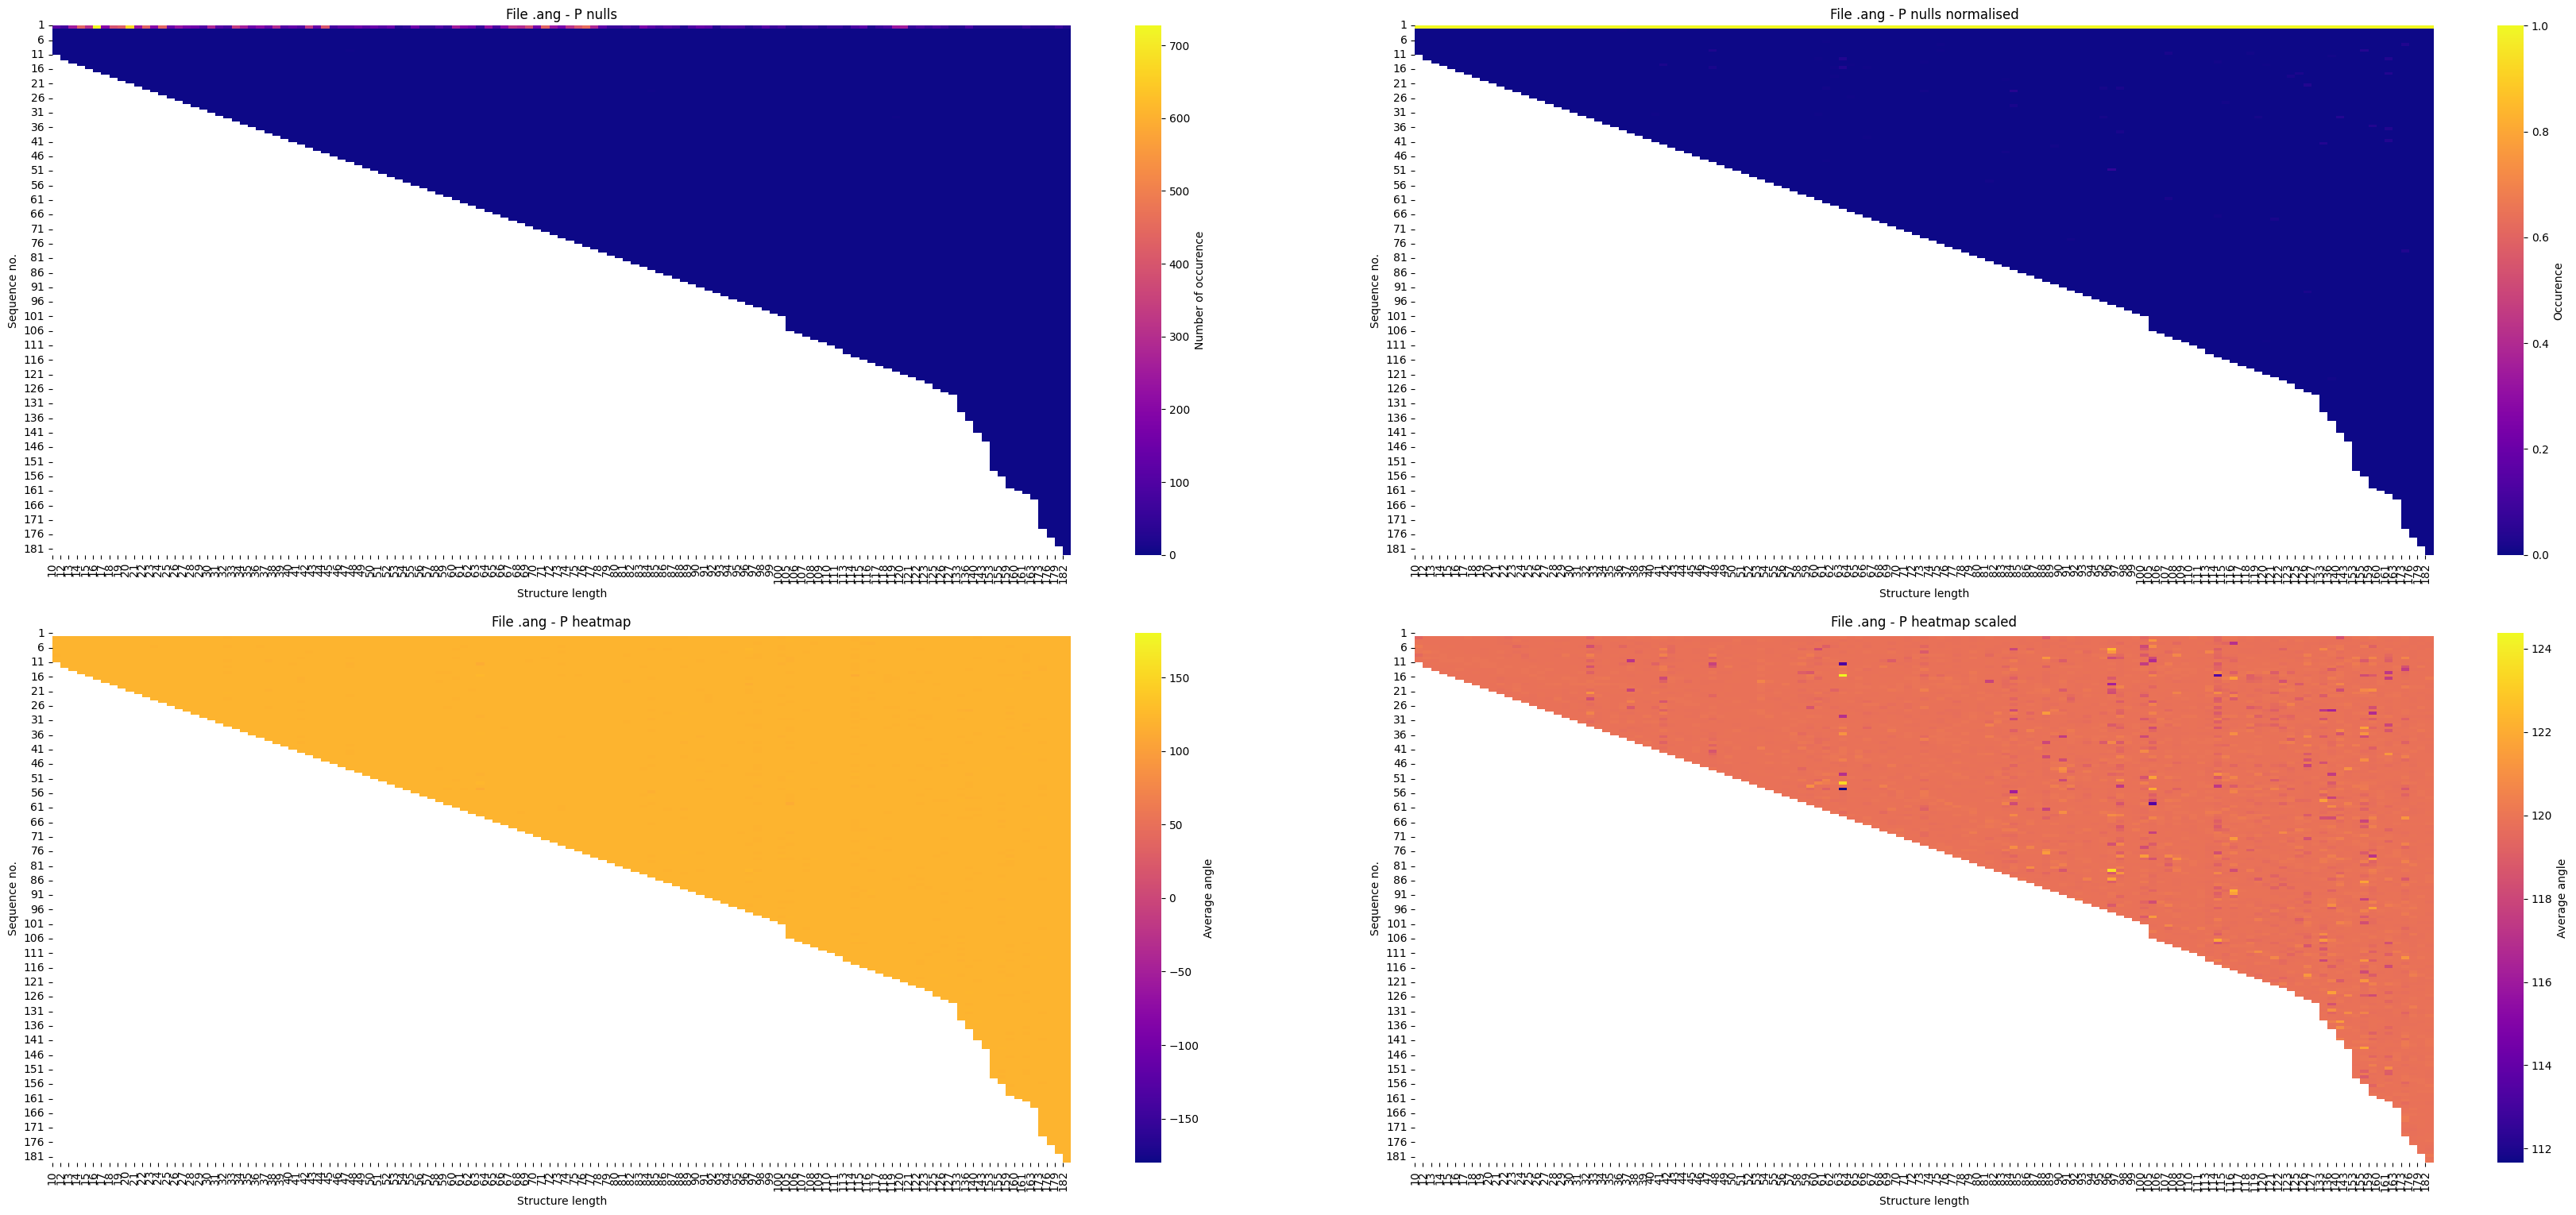

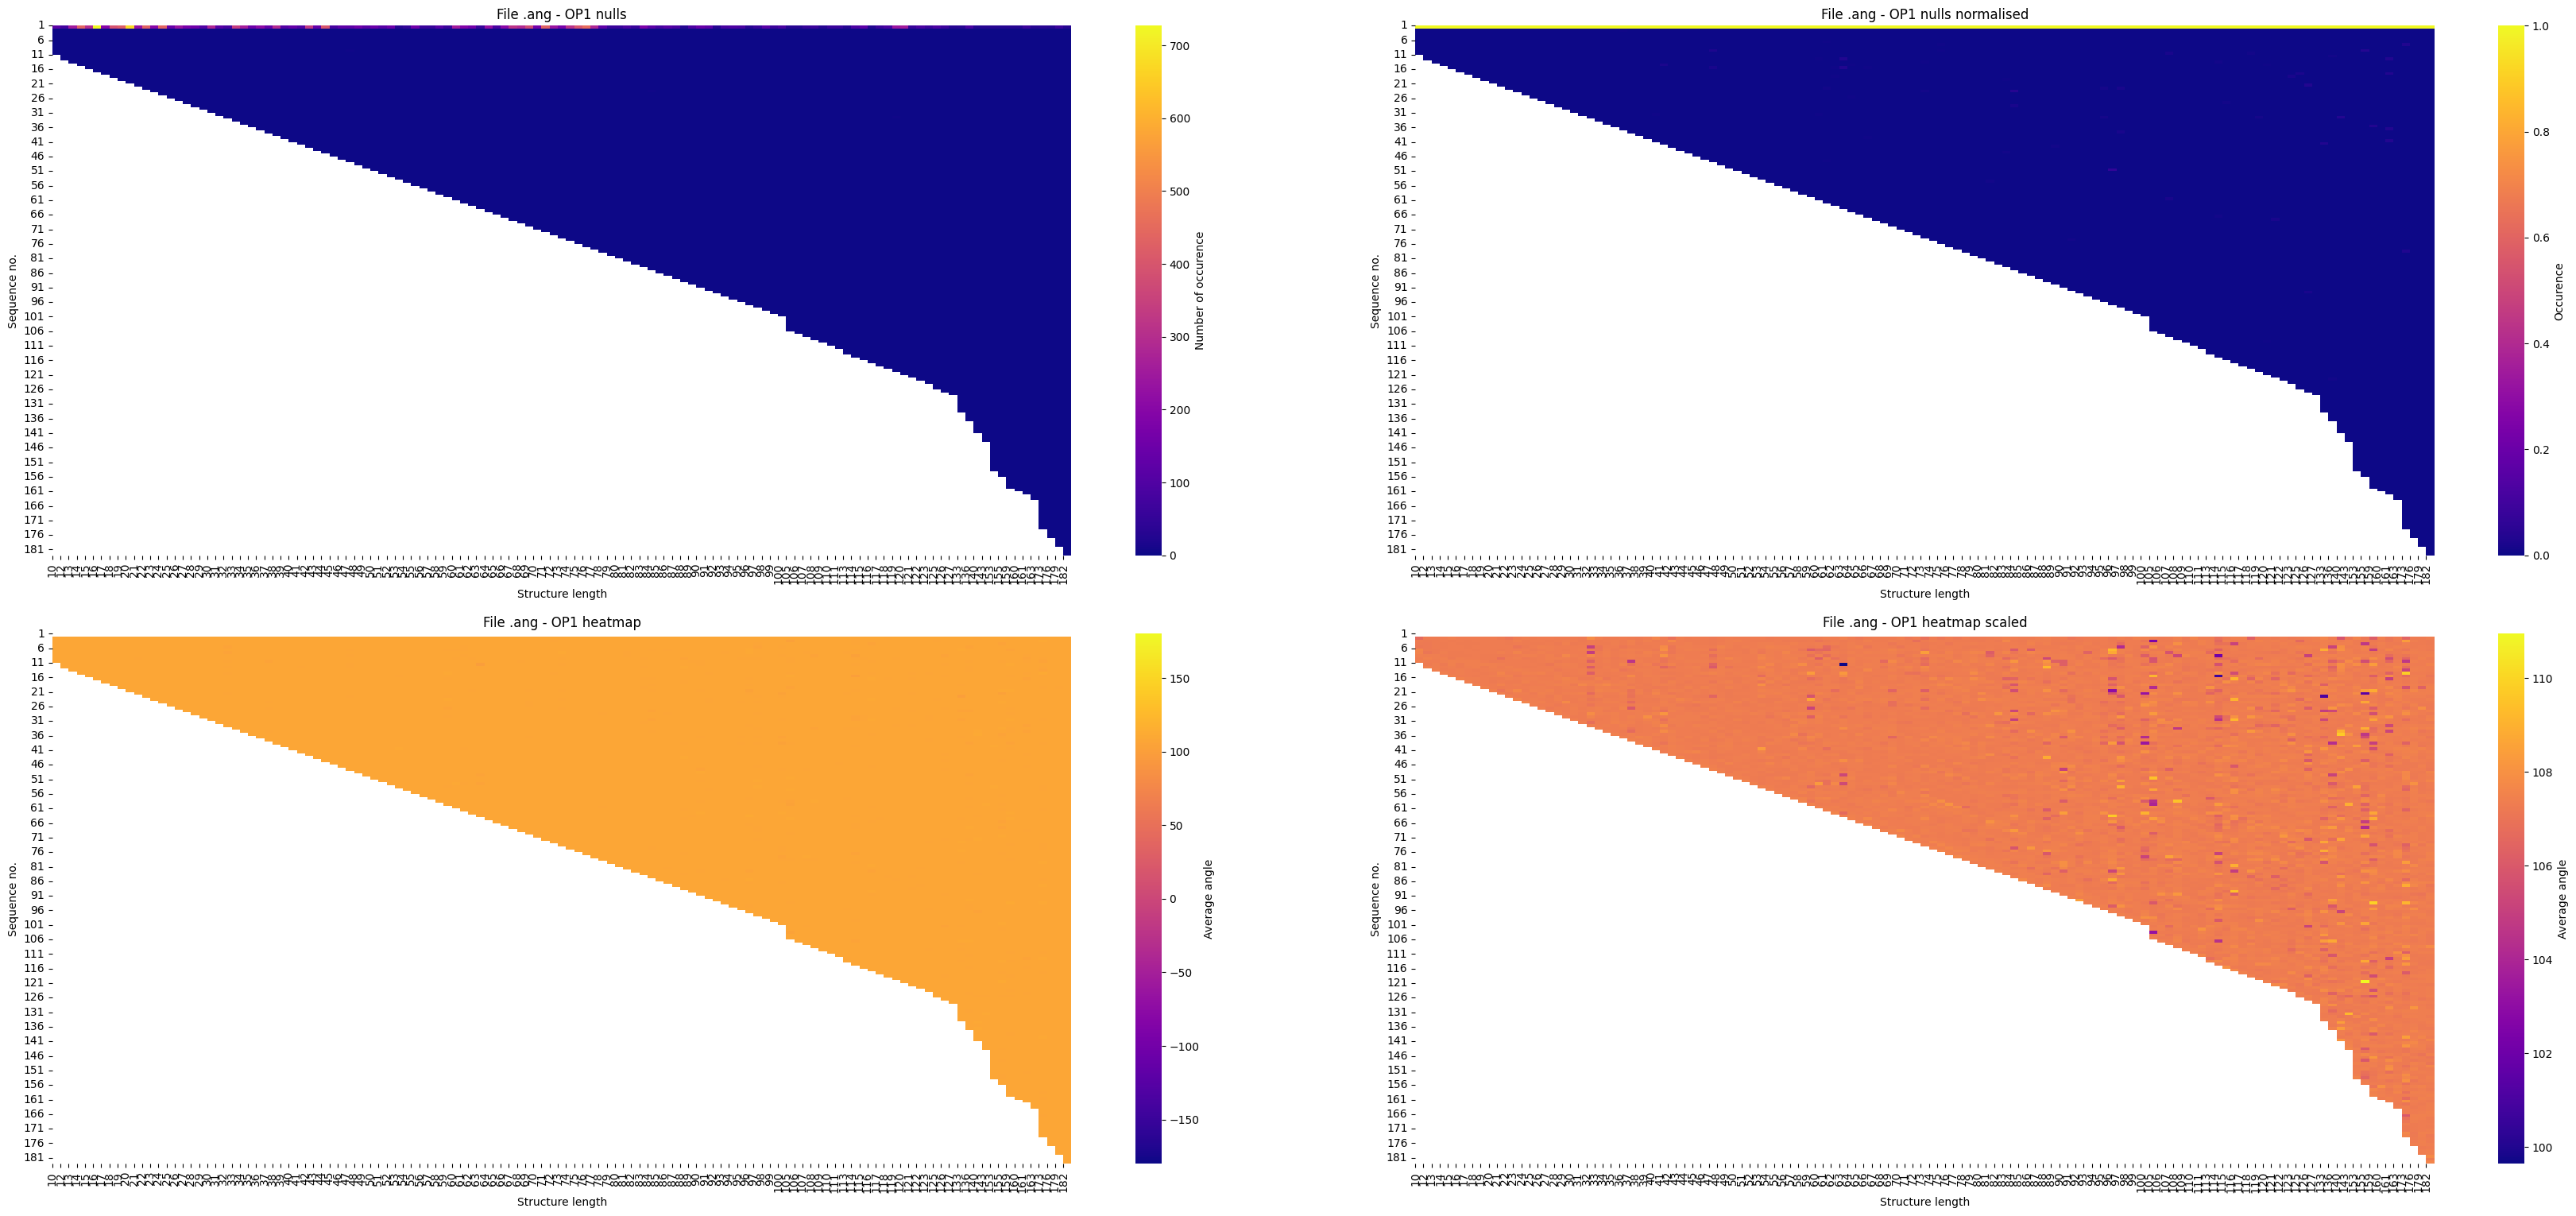

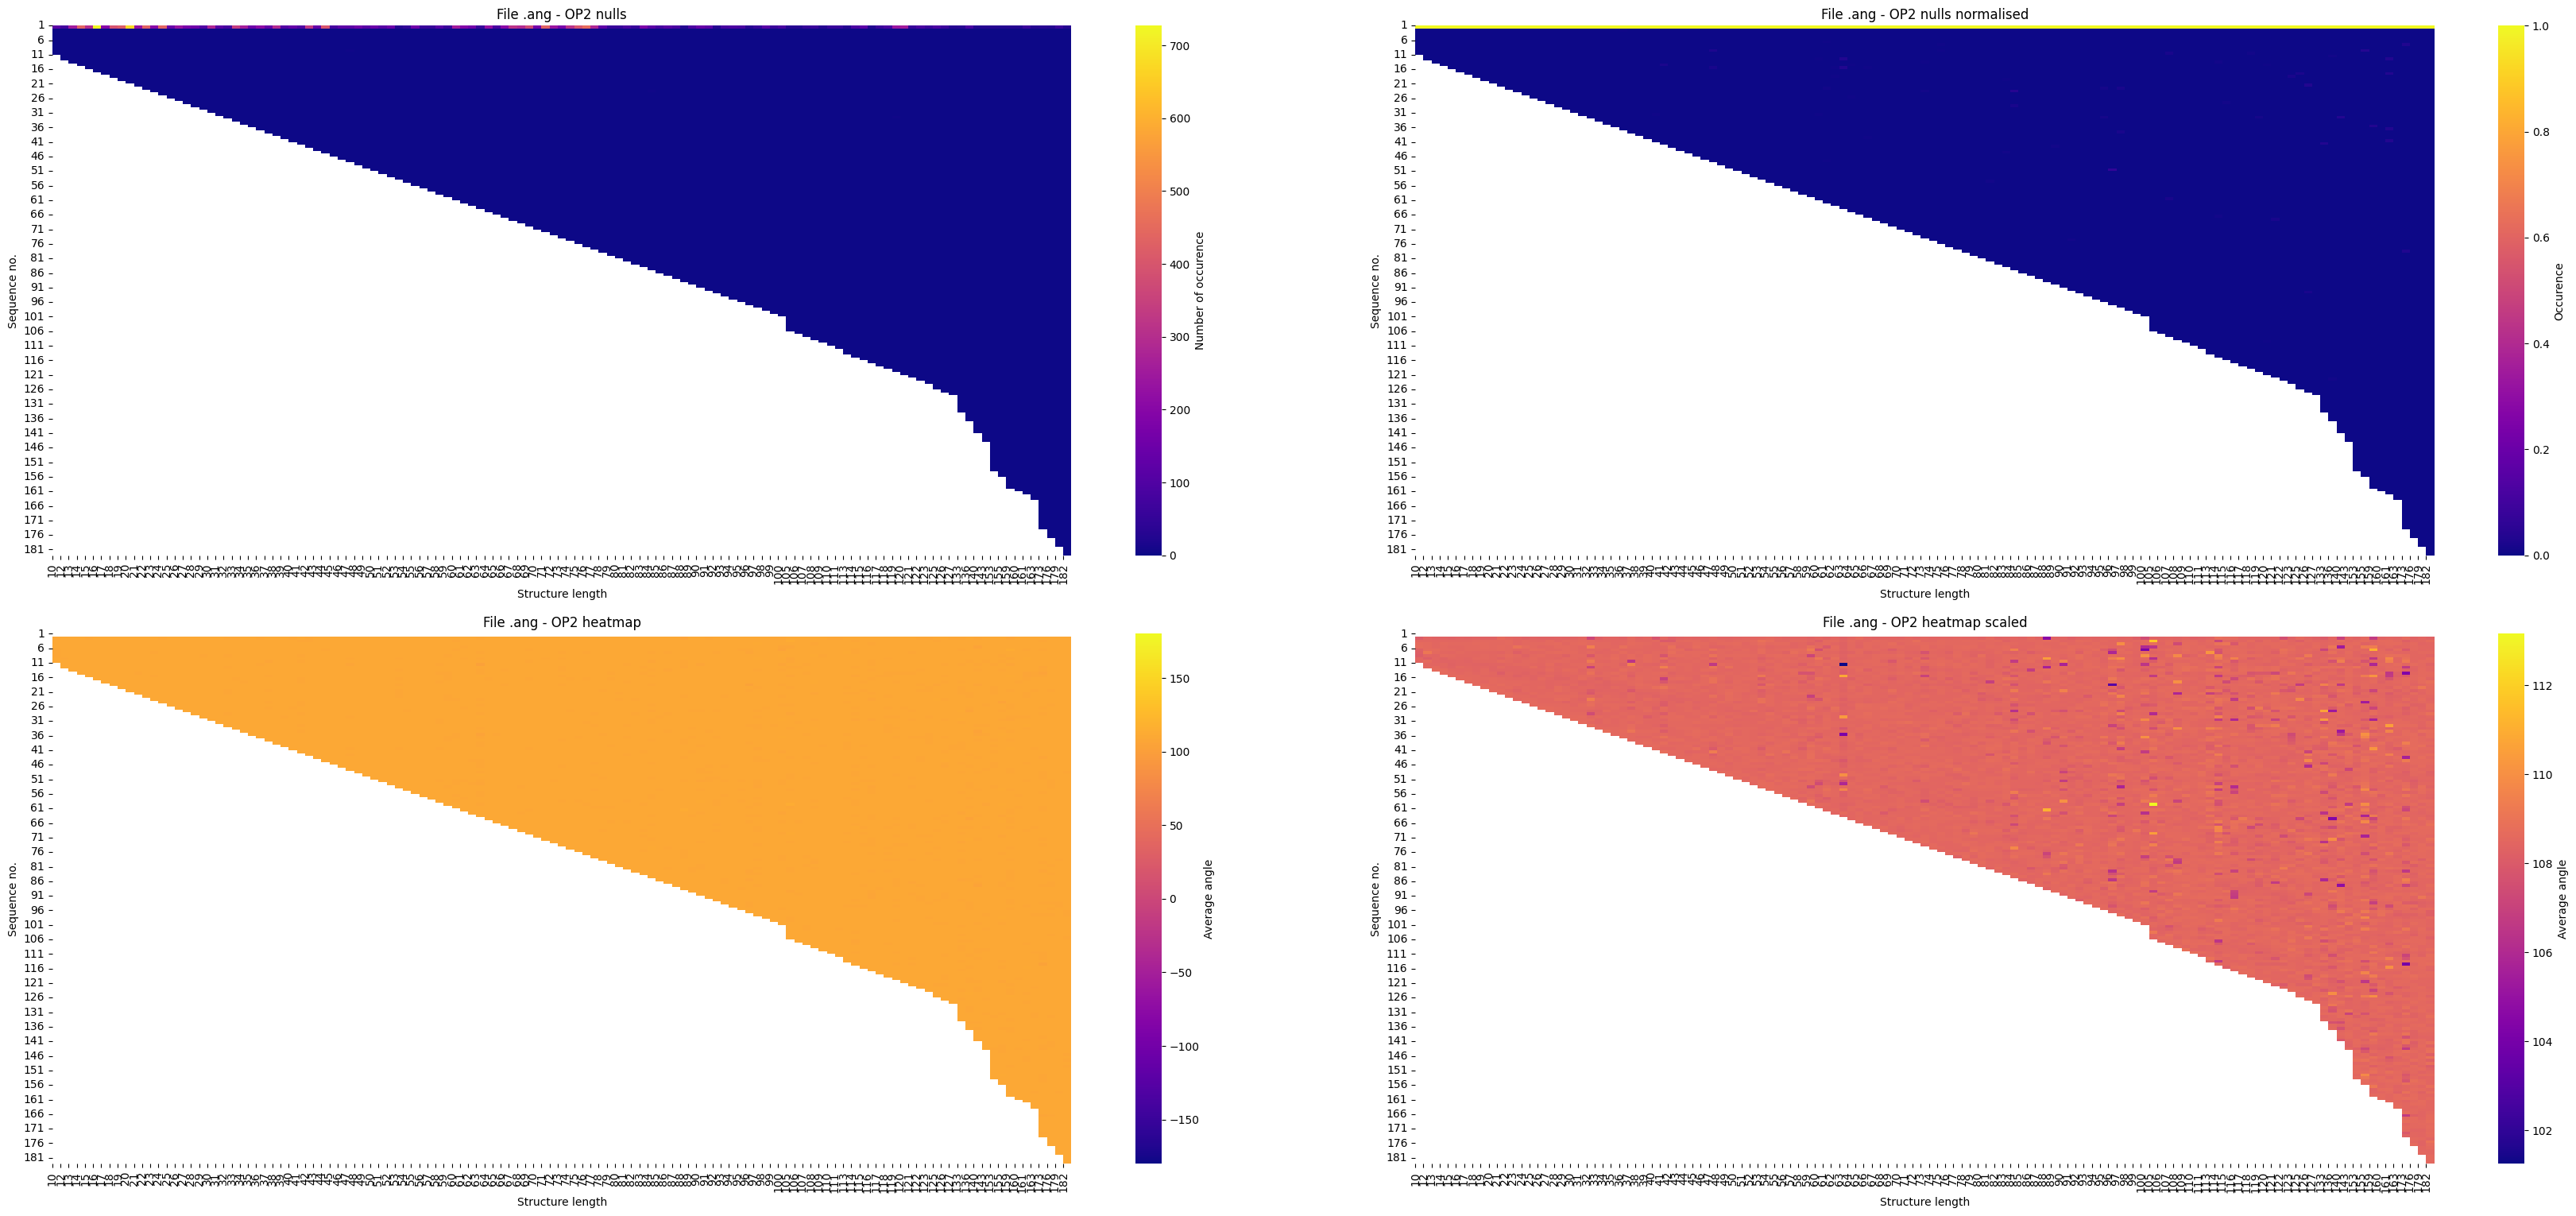

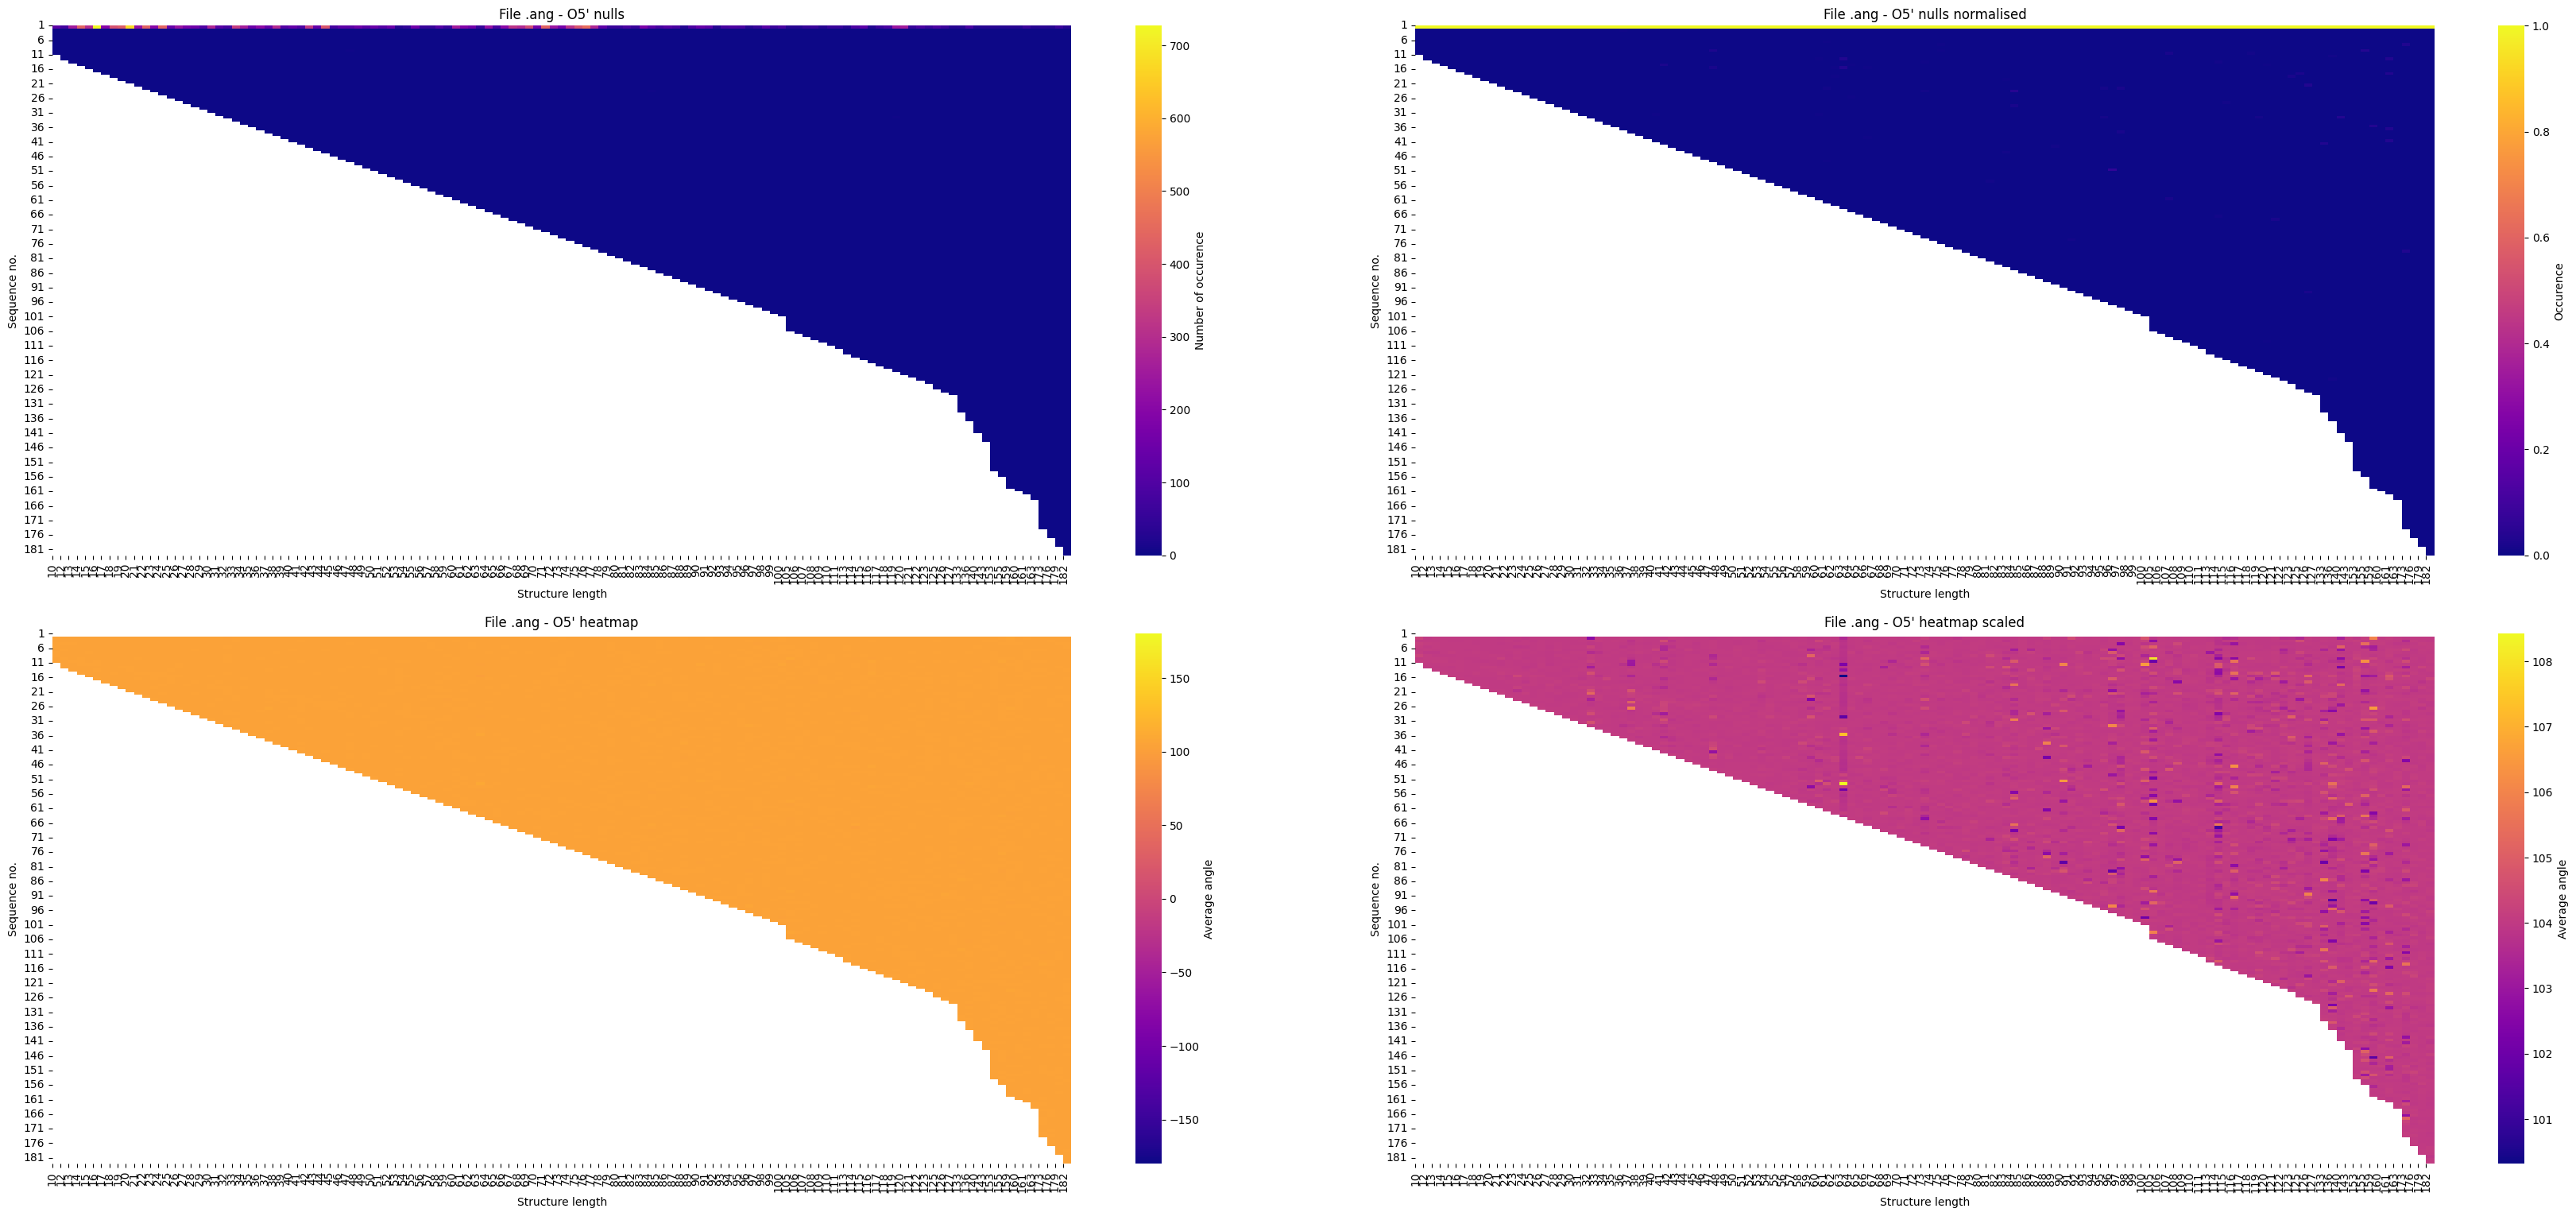

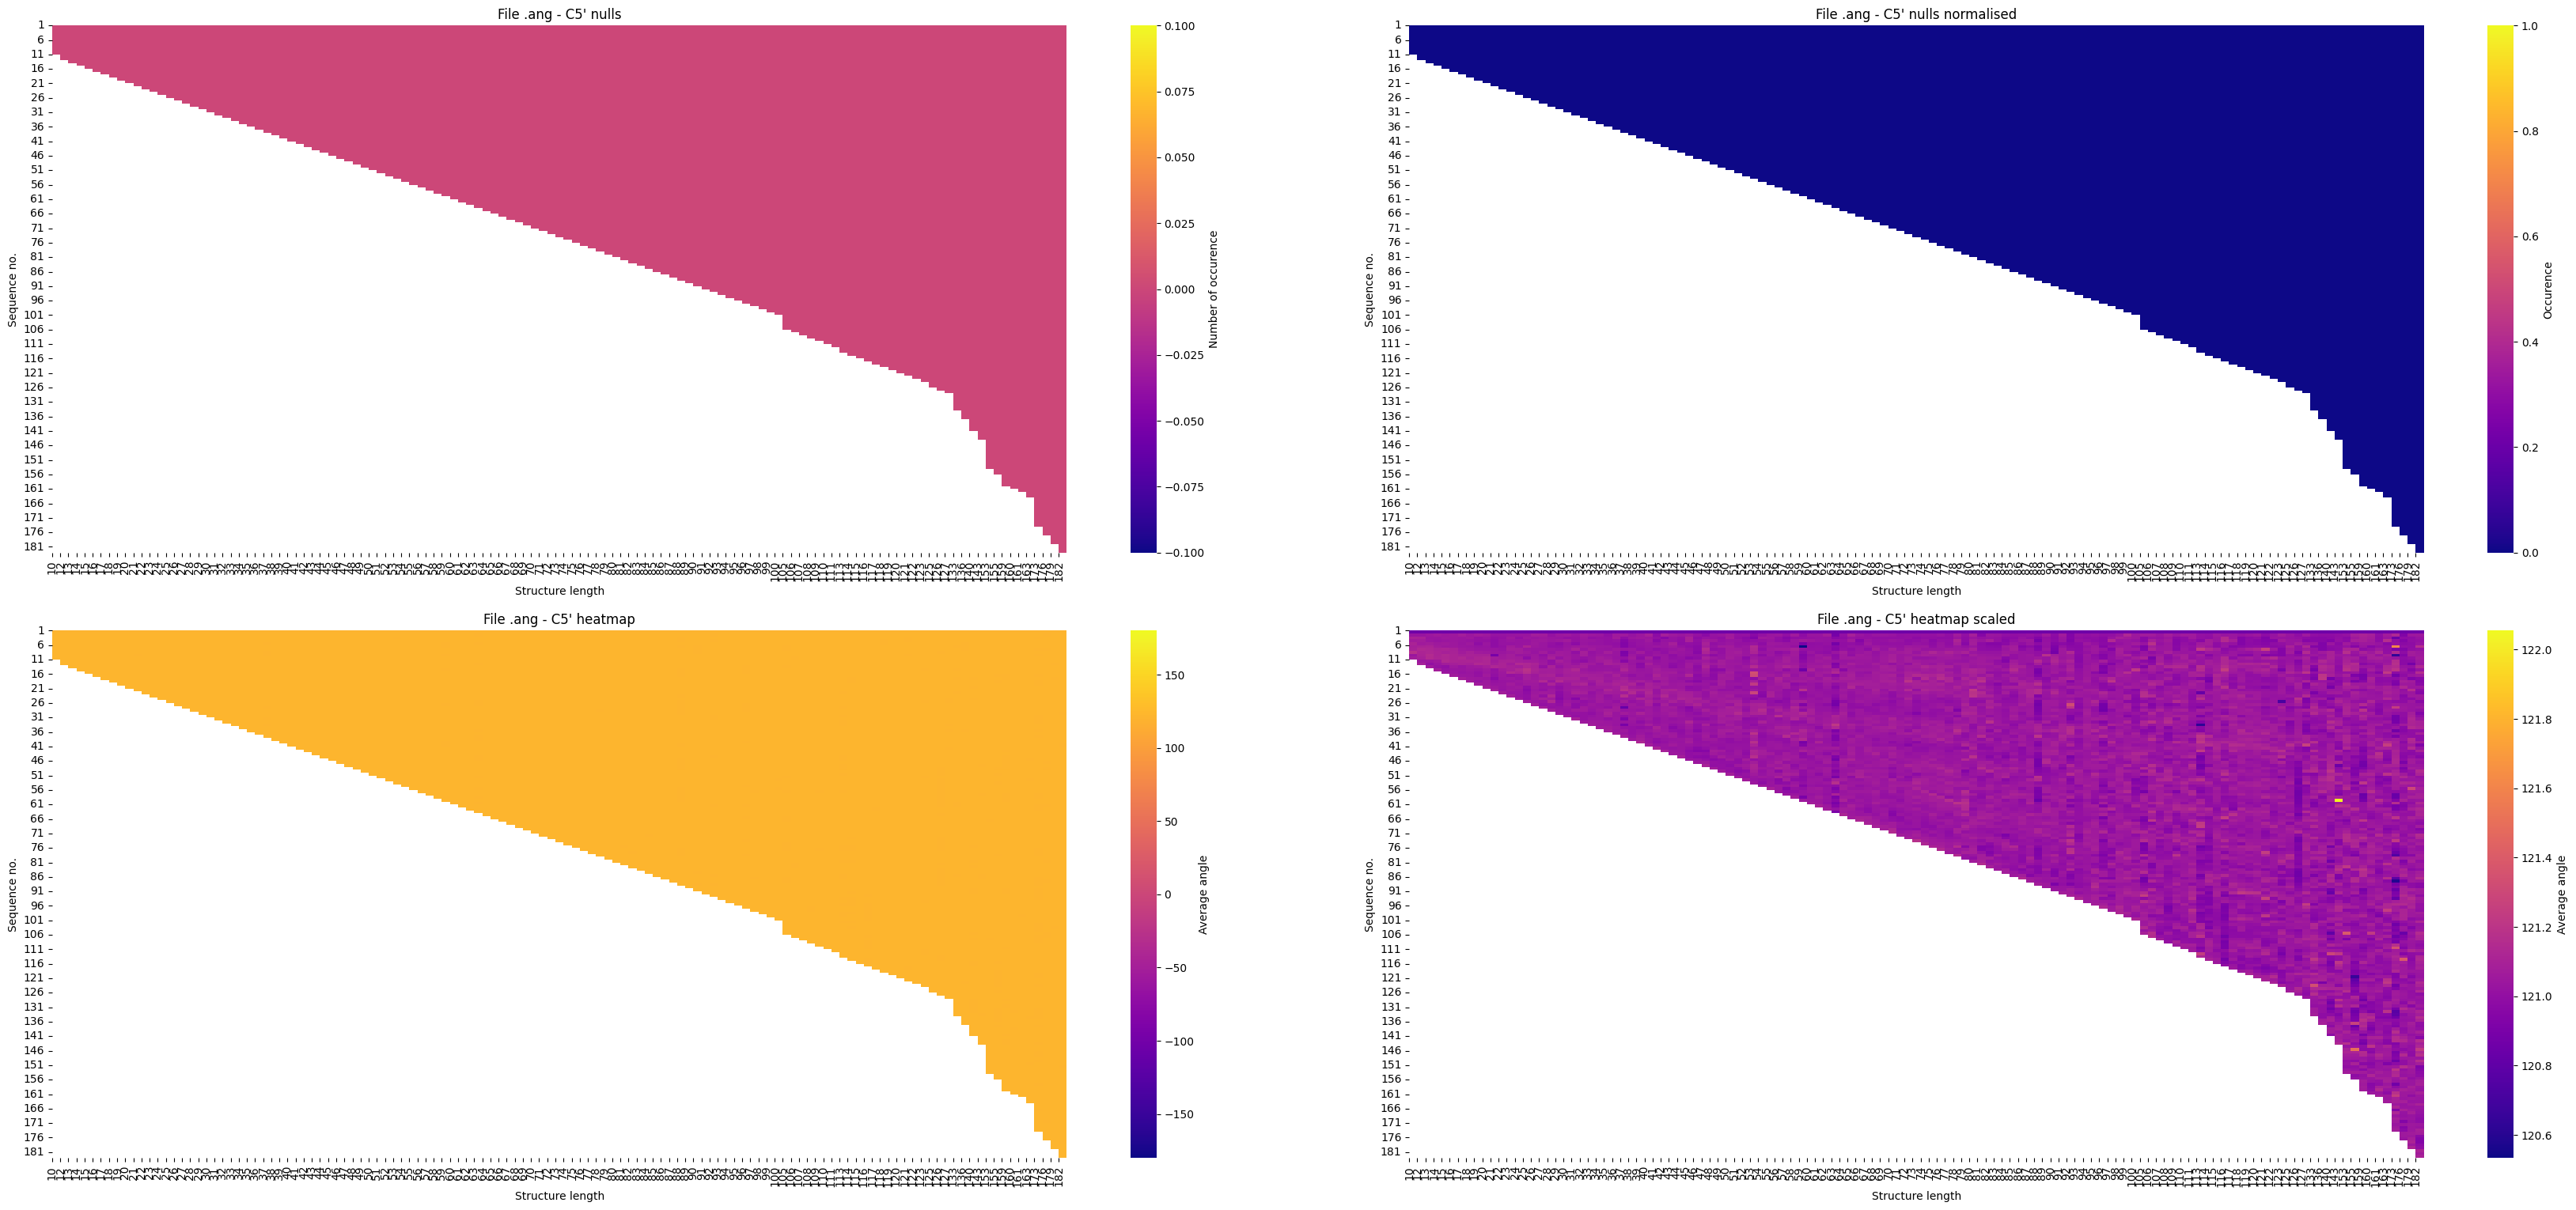

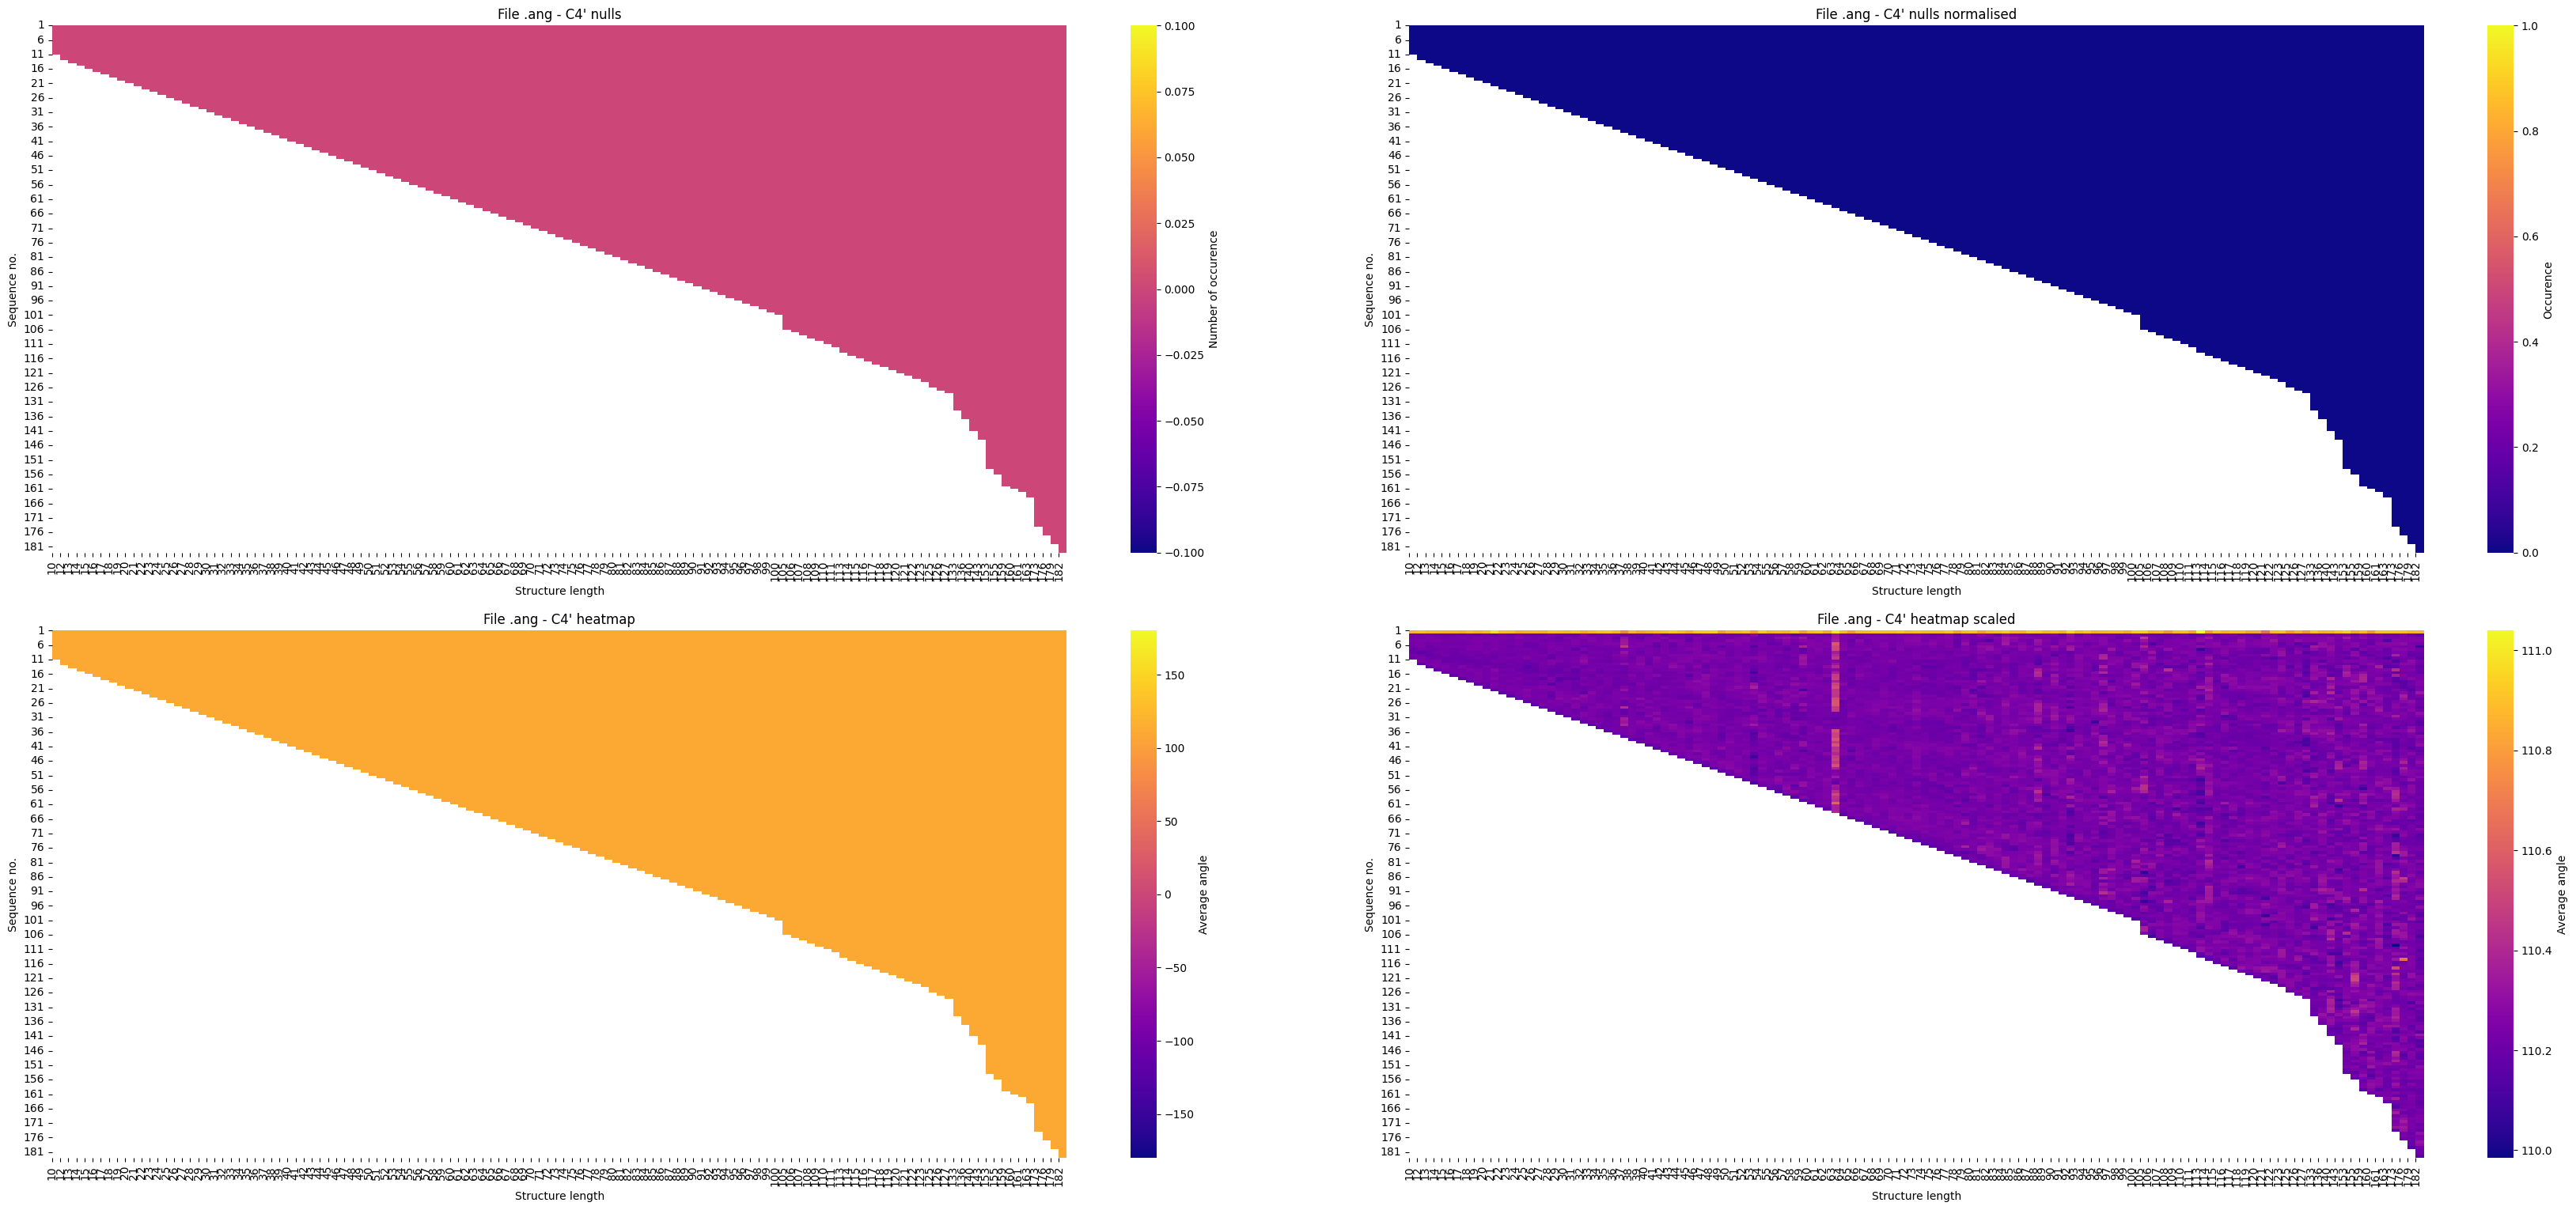

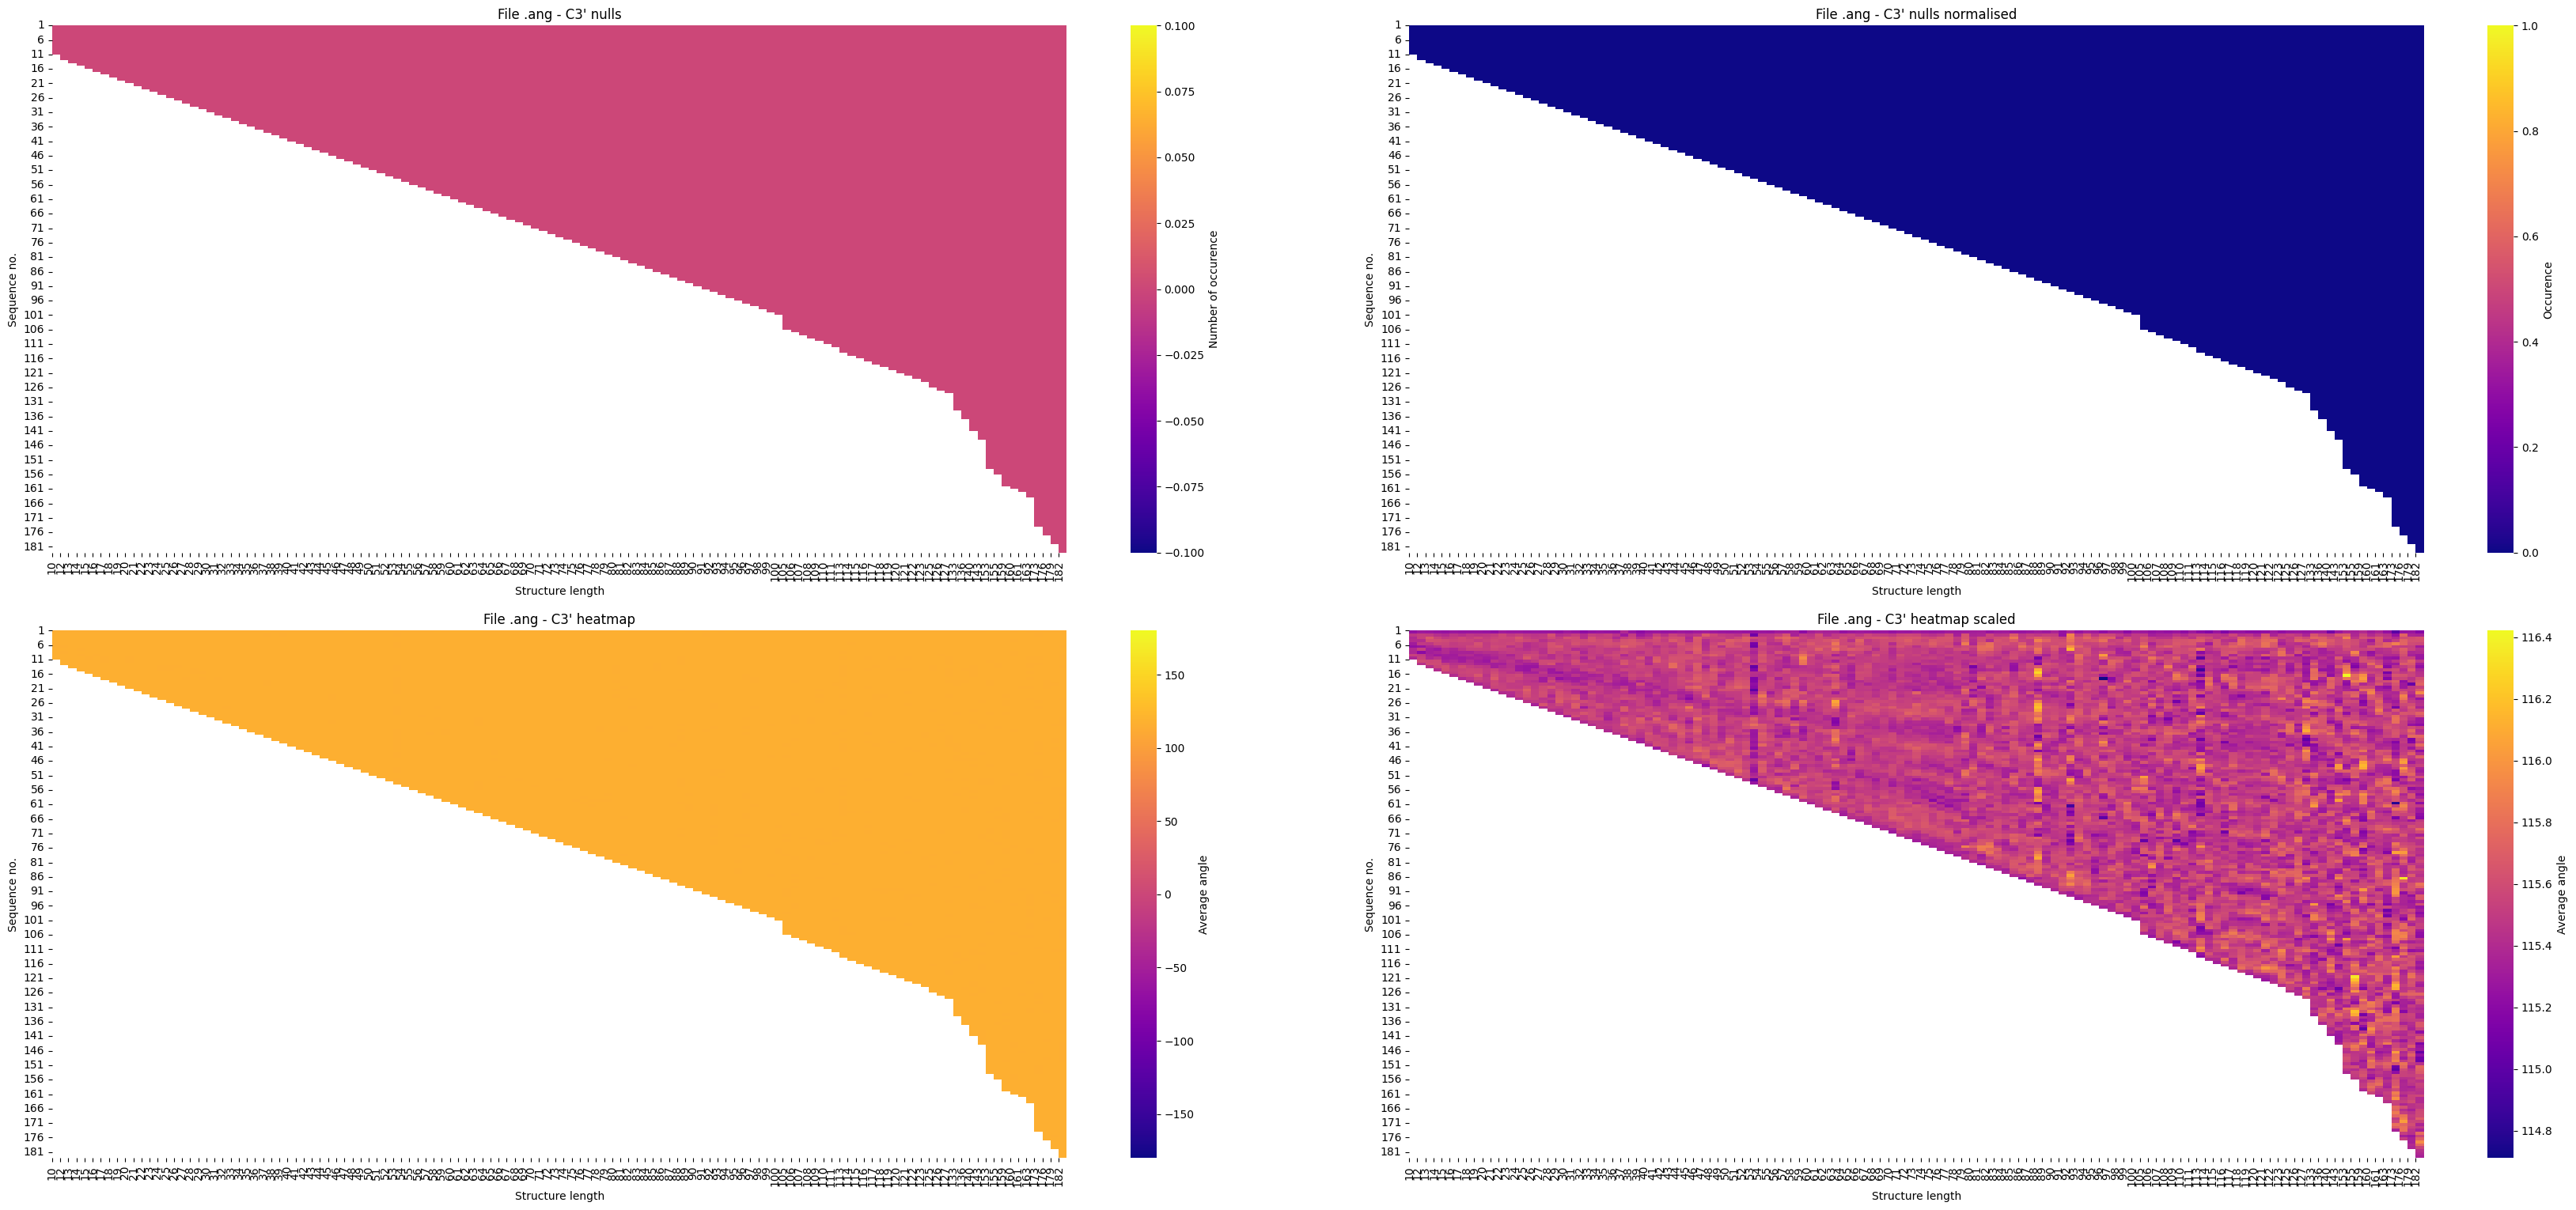

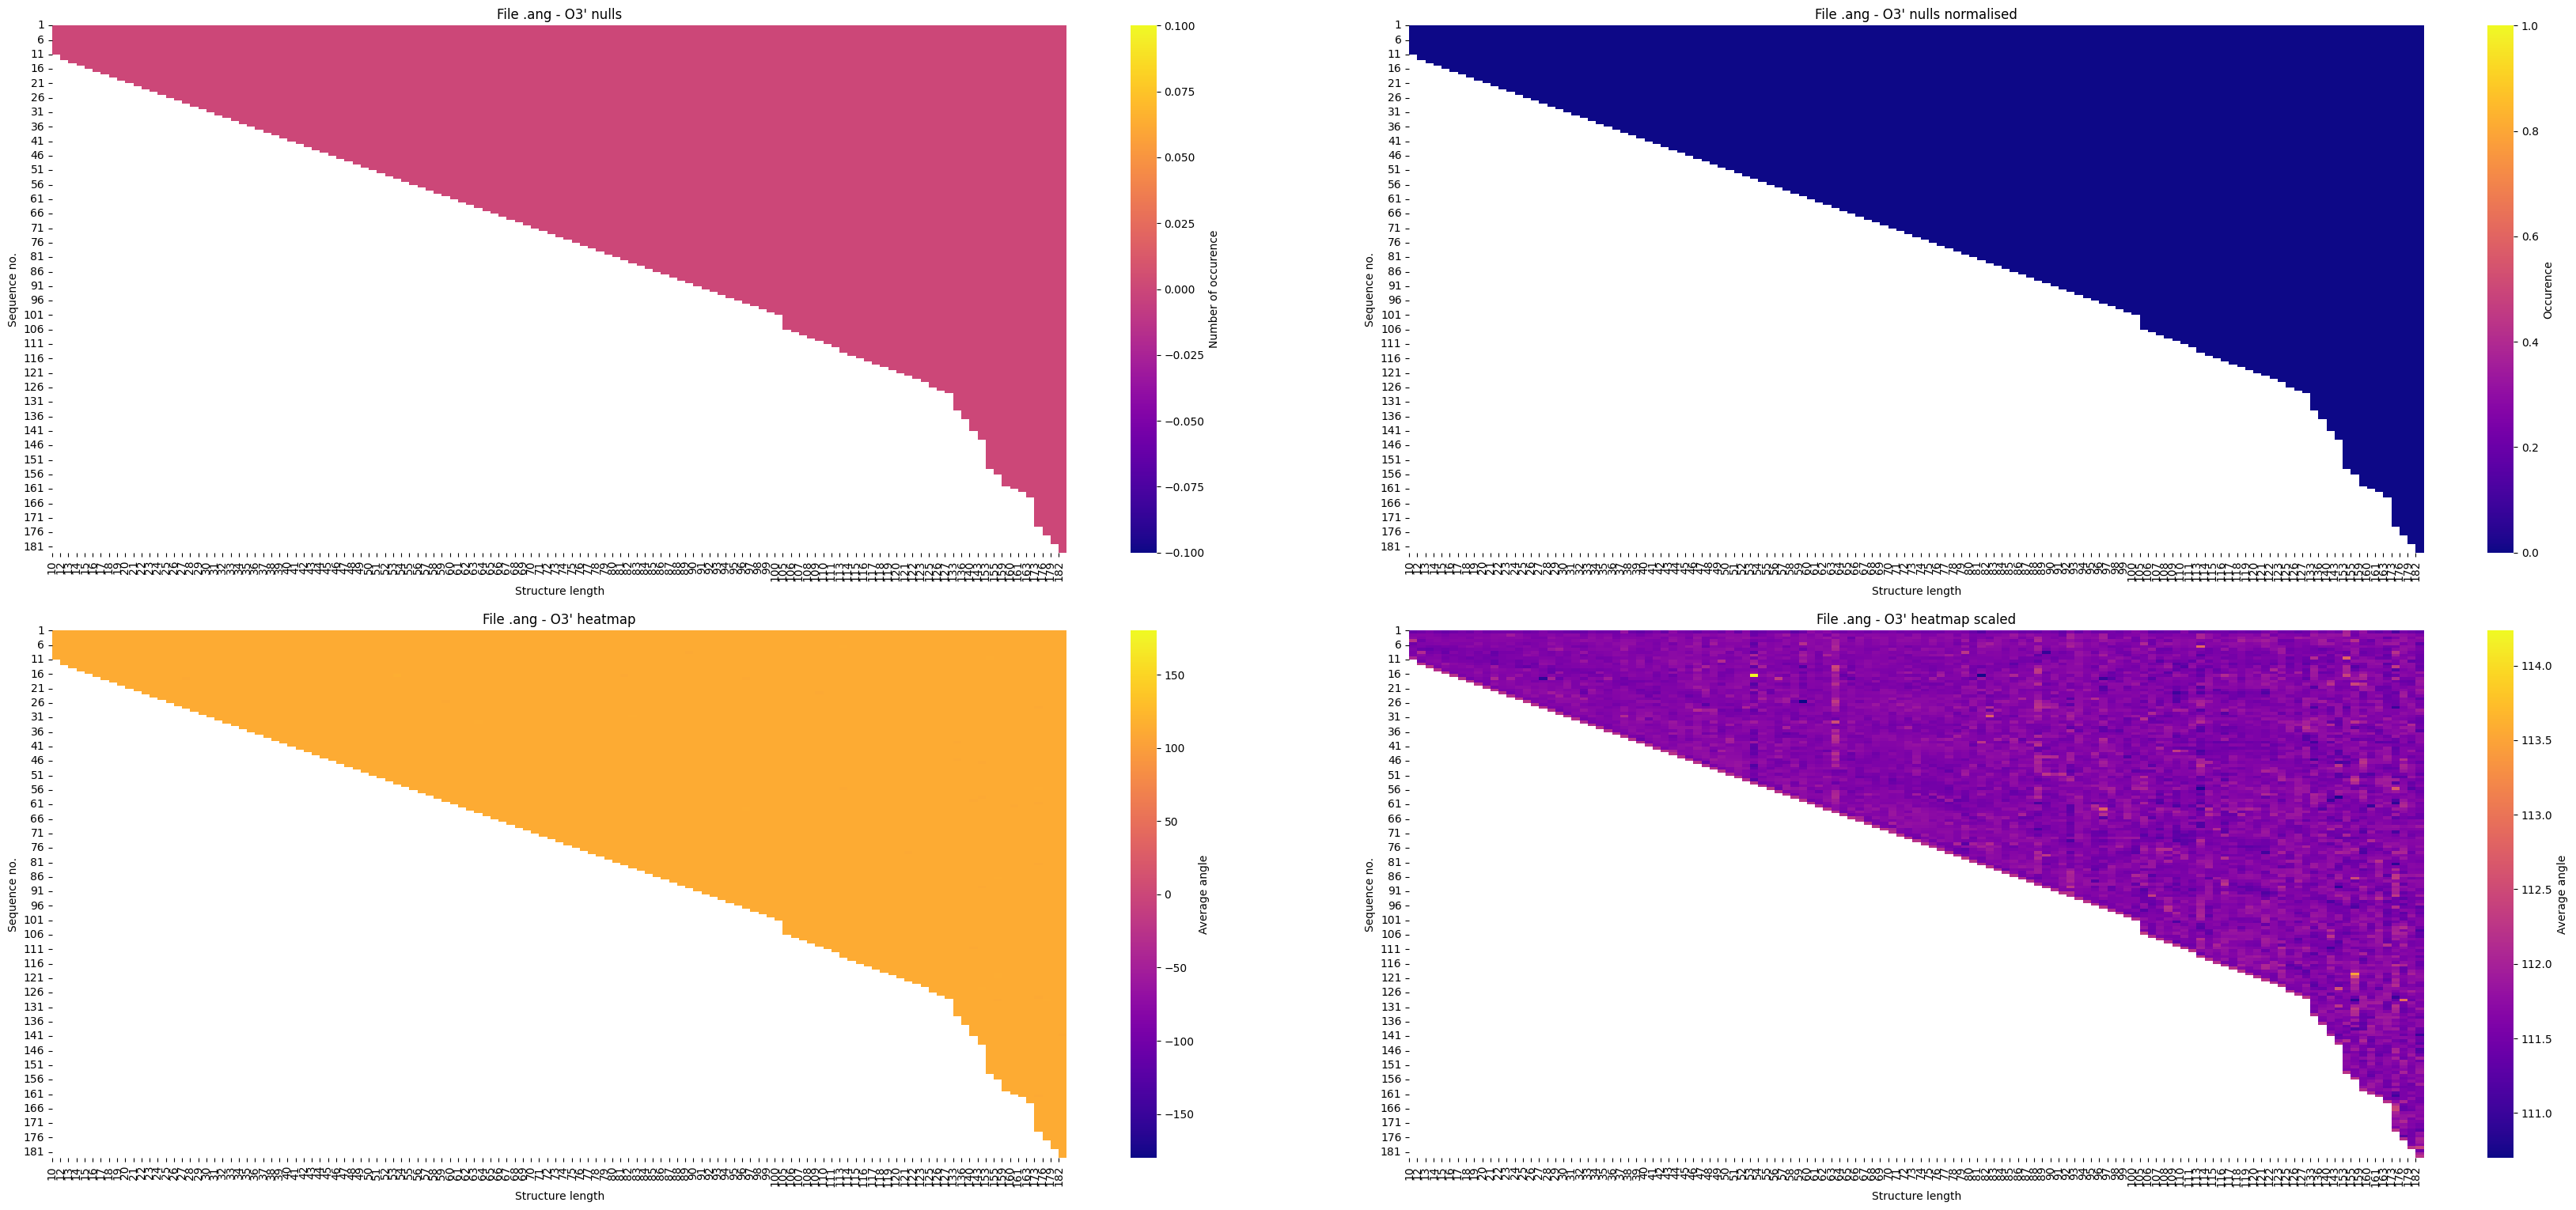

### Filetype: .atr ###


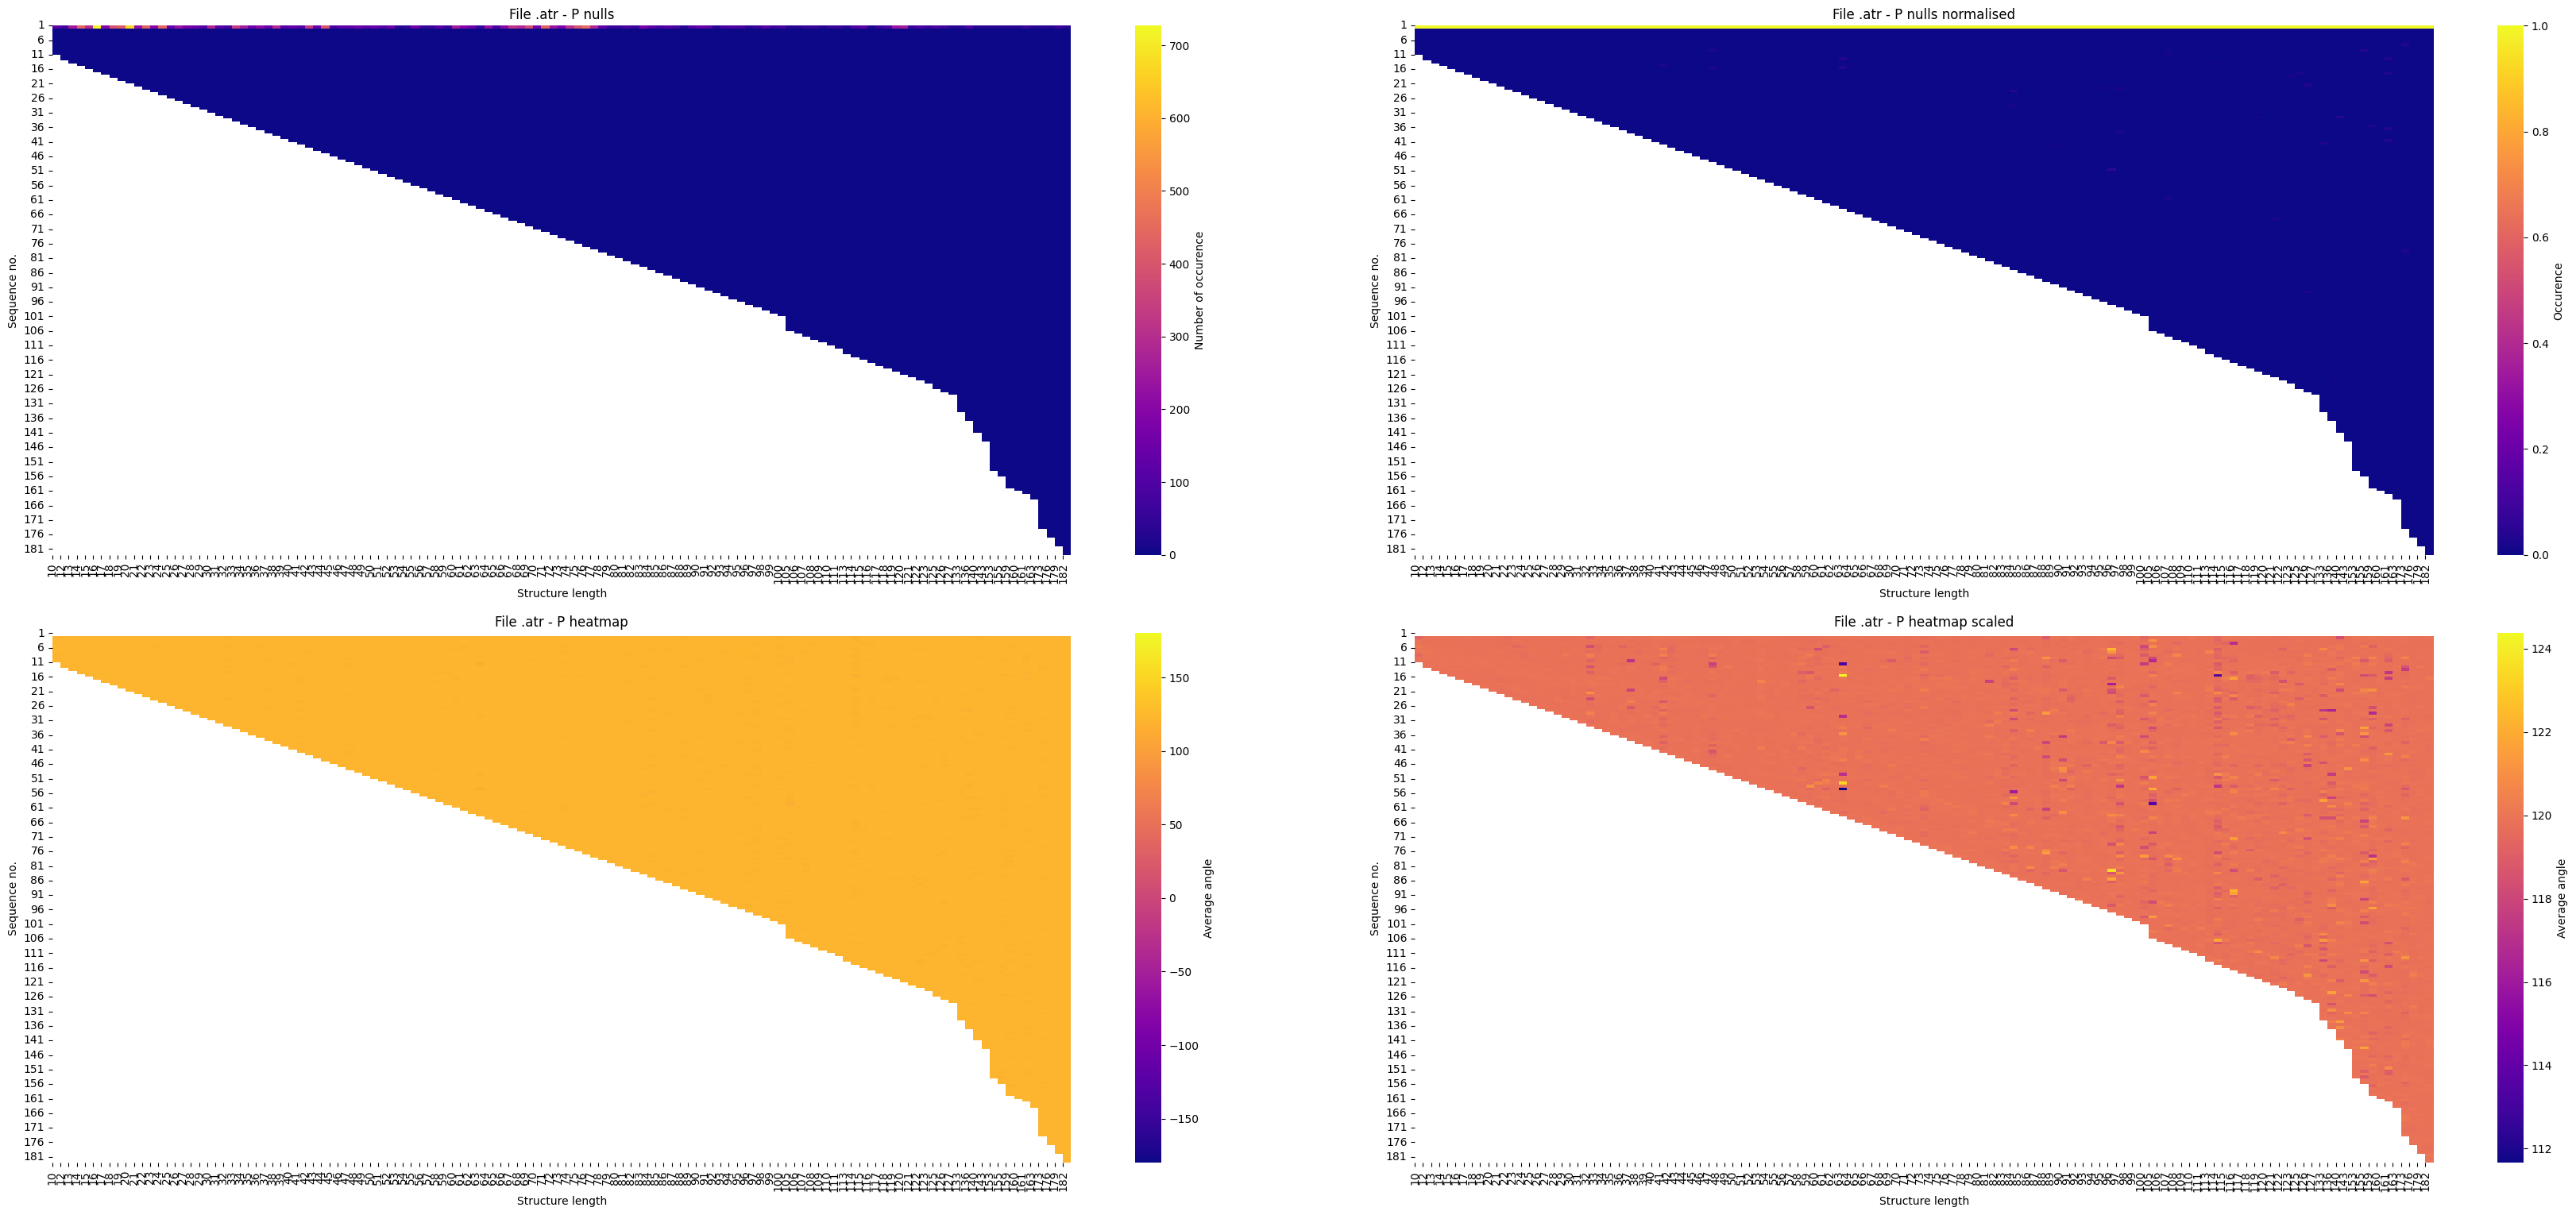

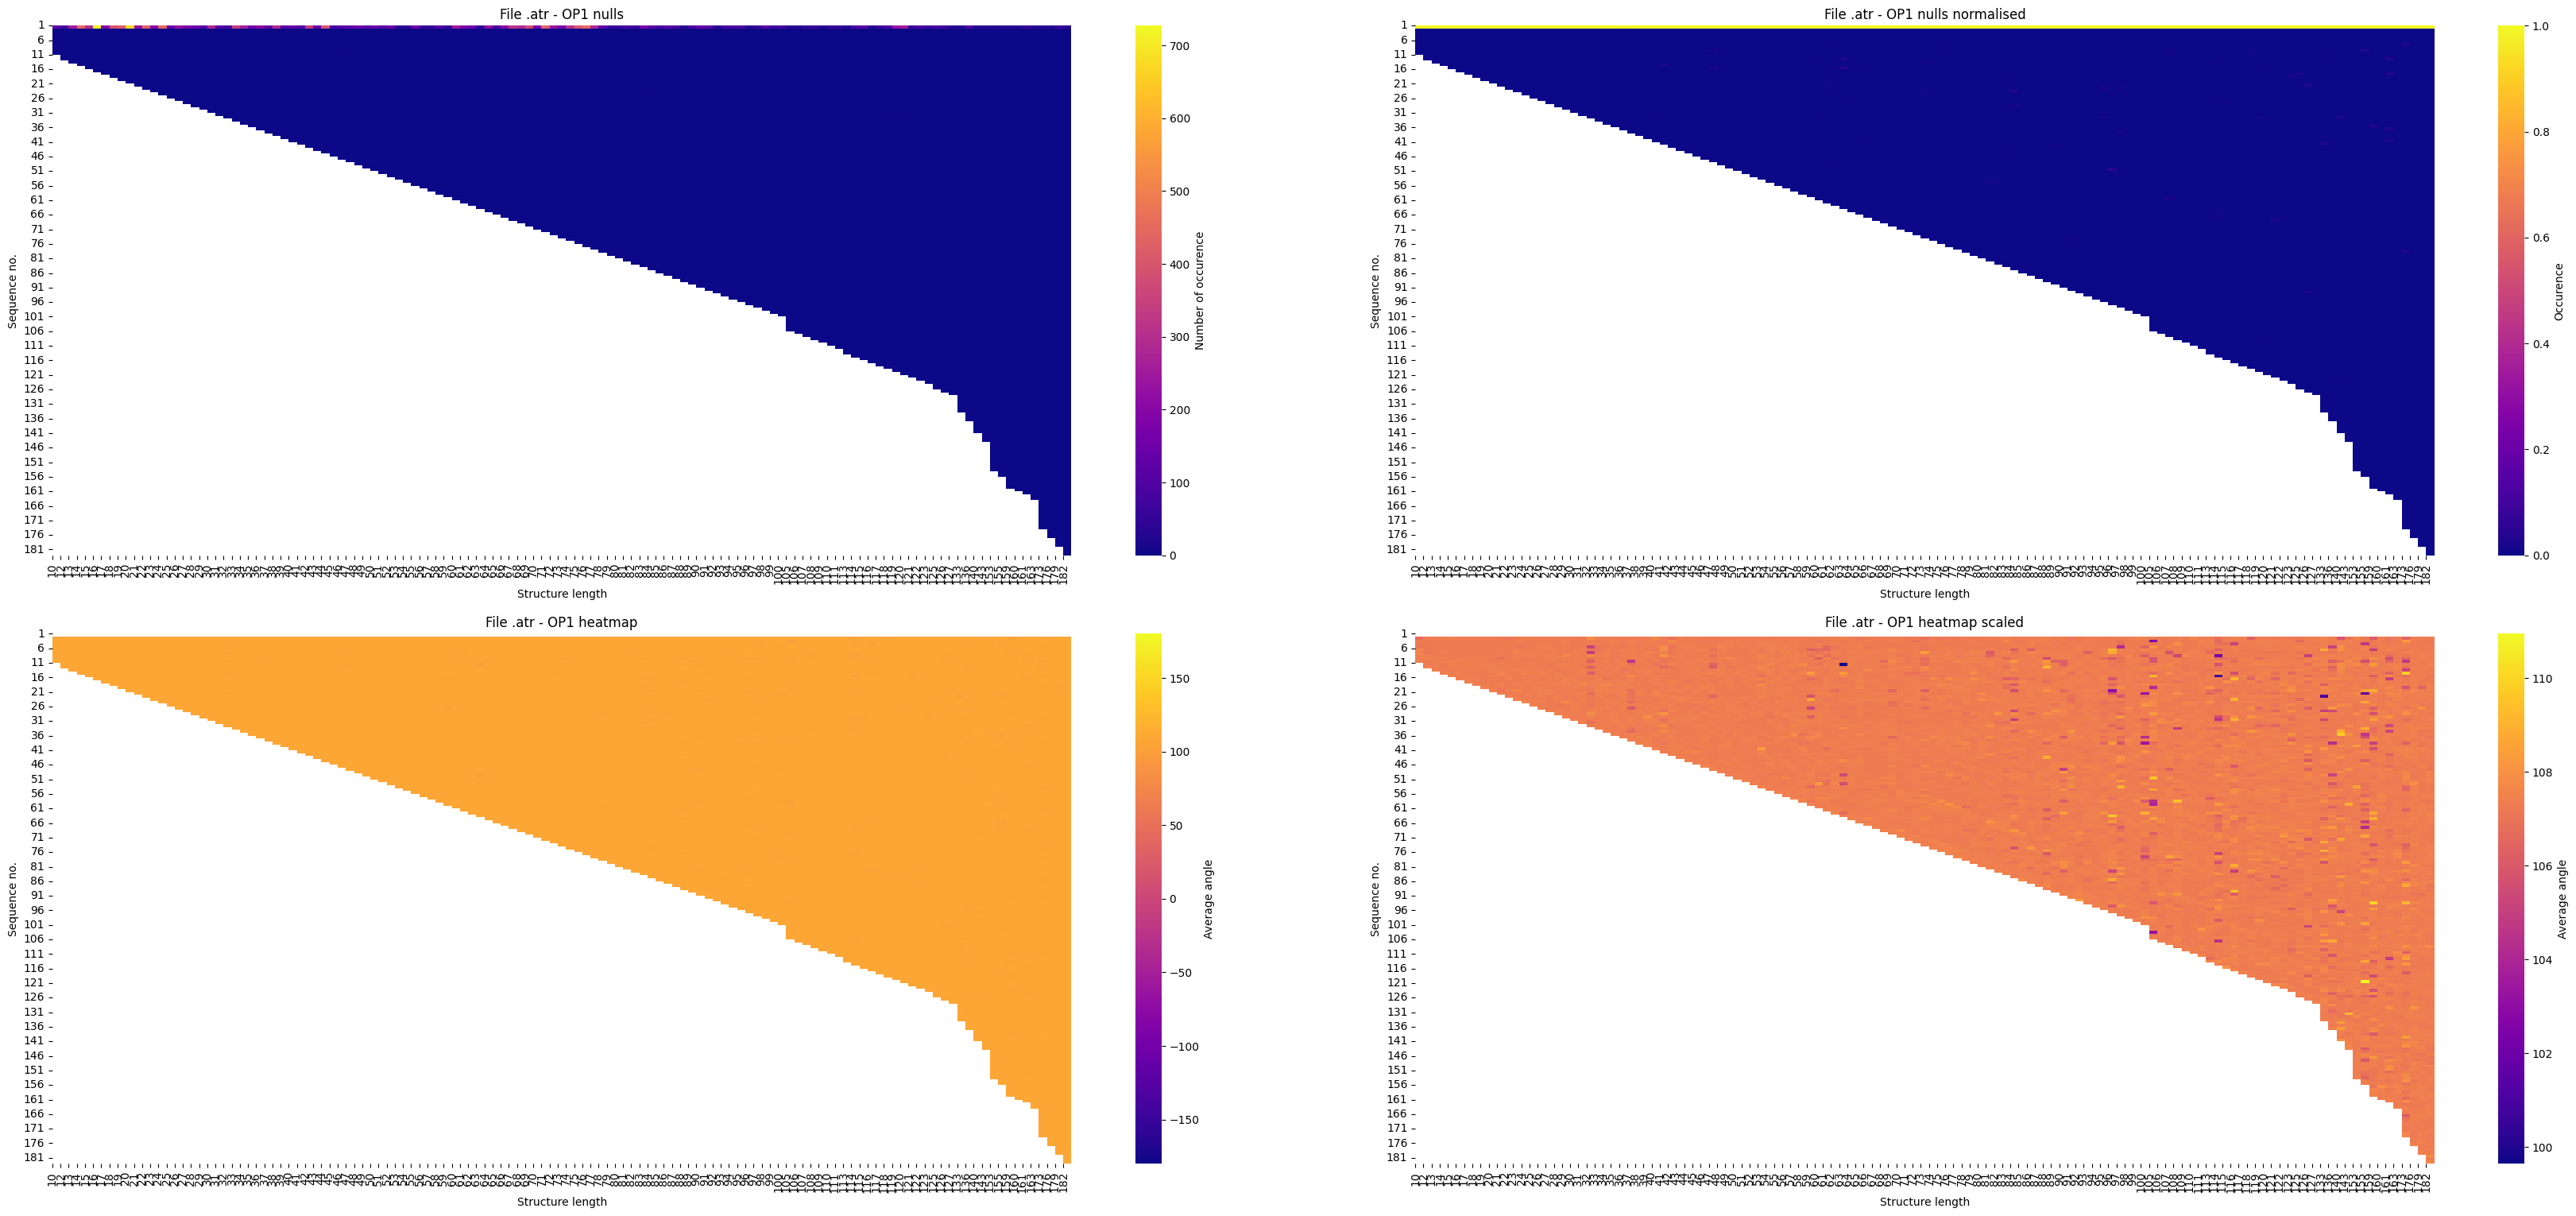

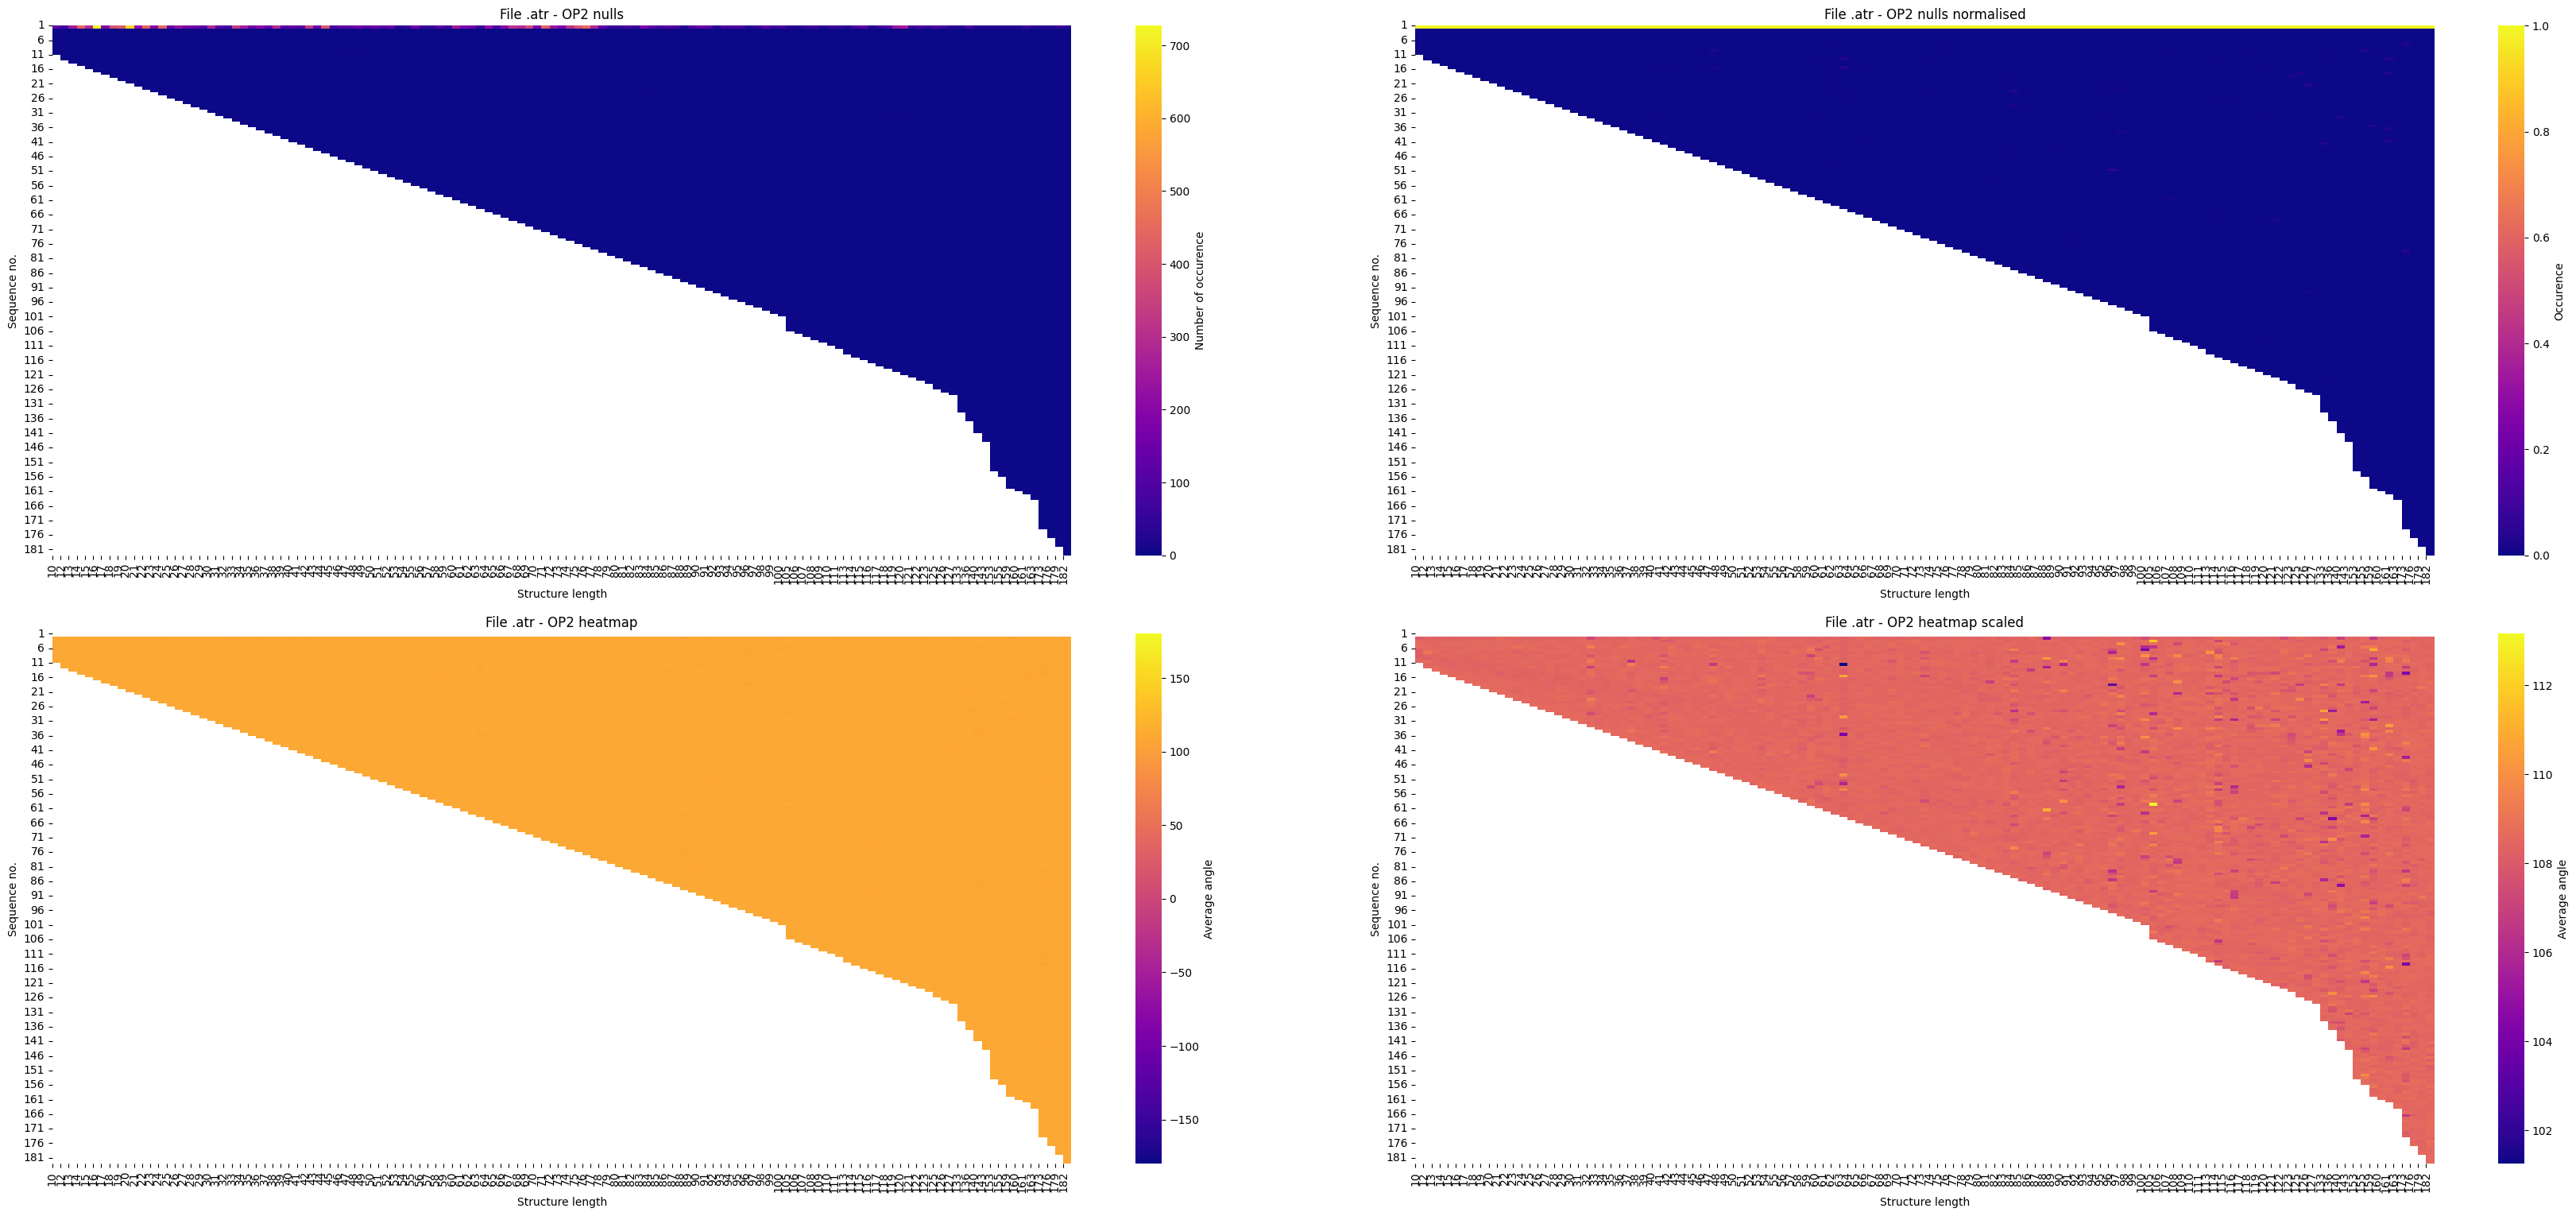

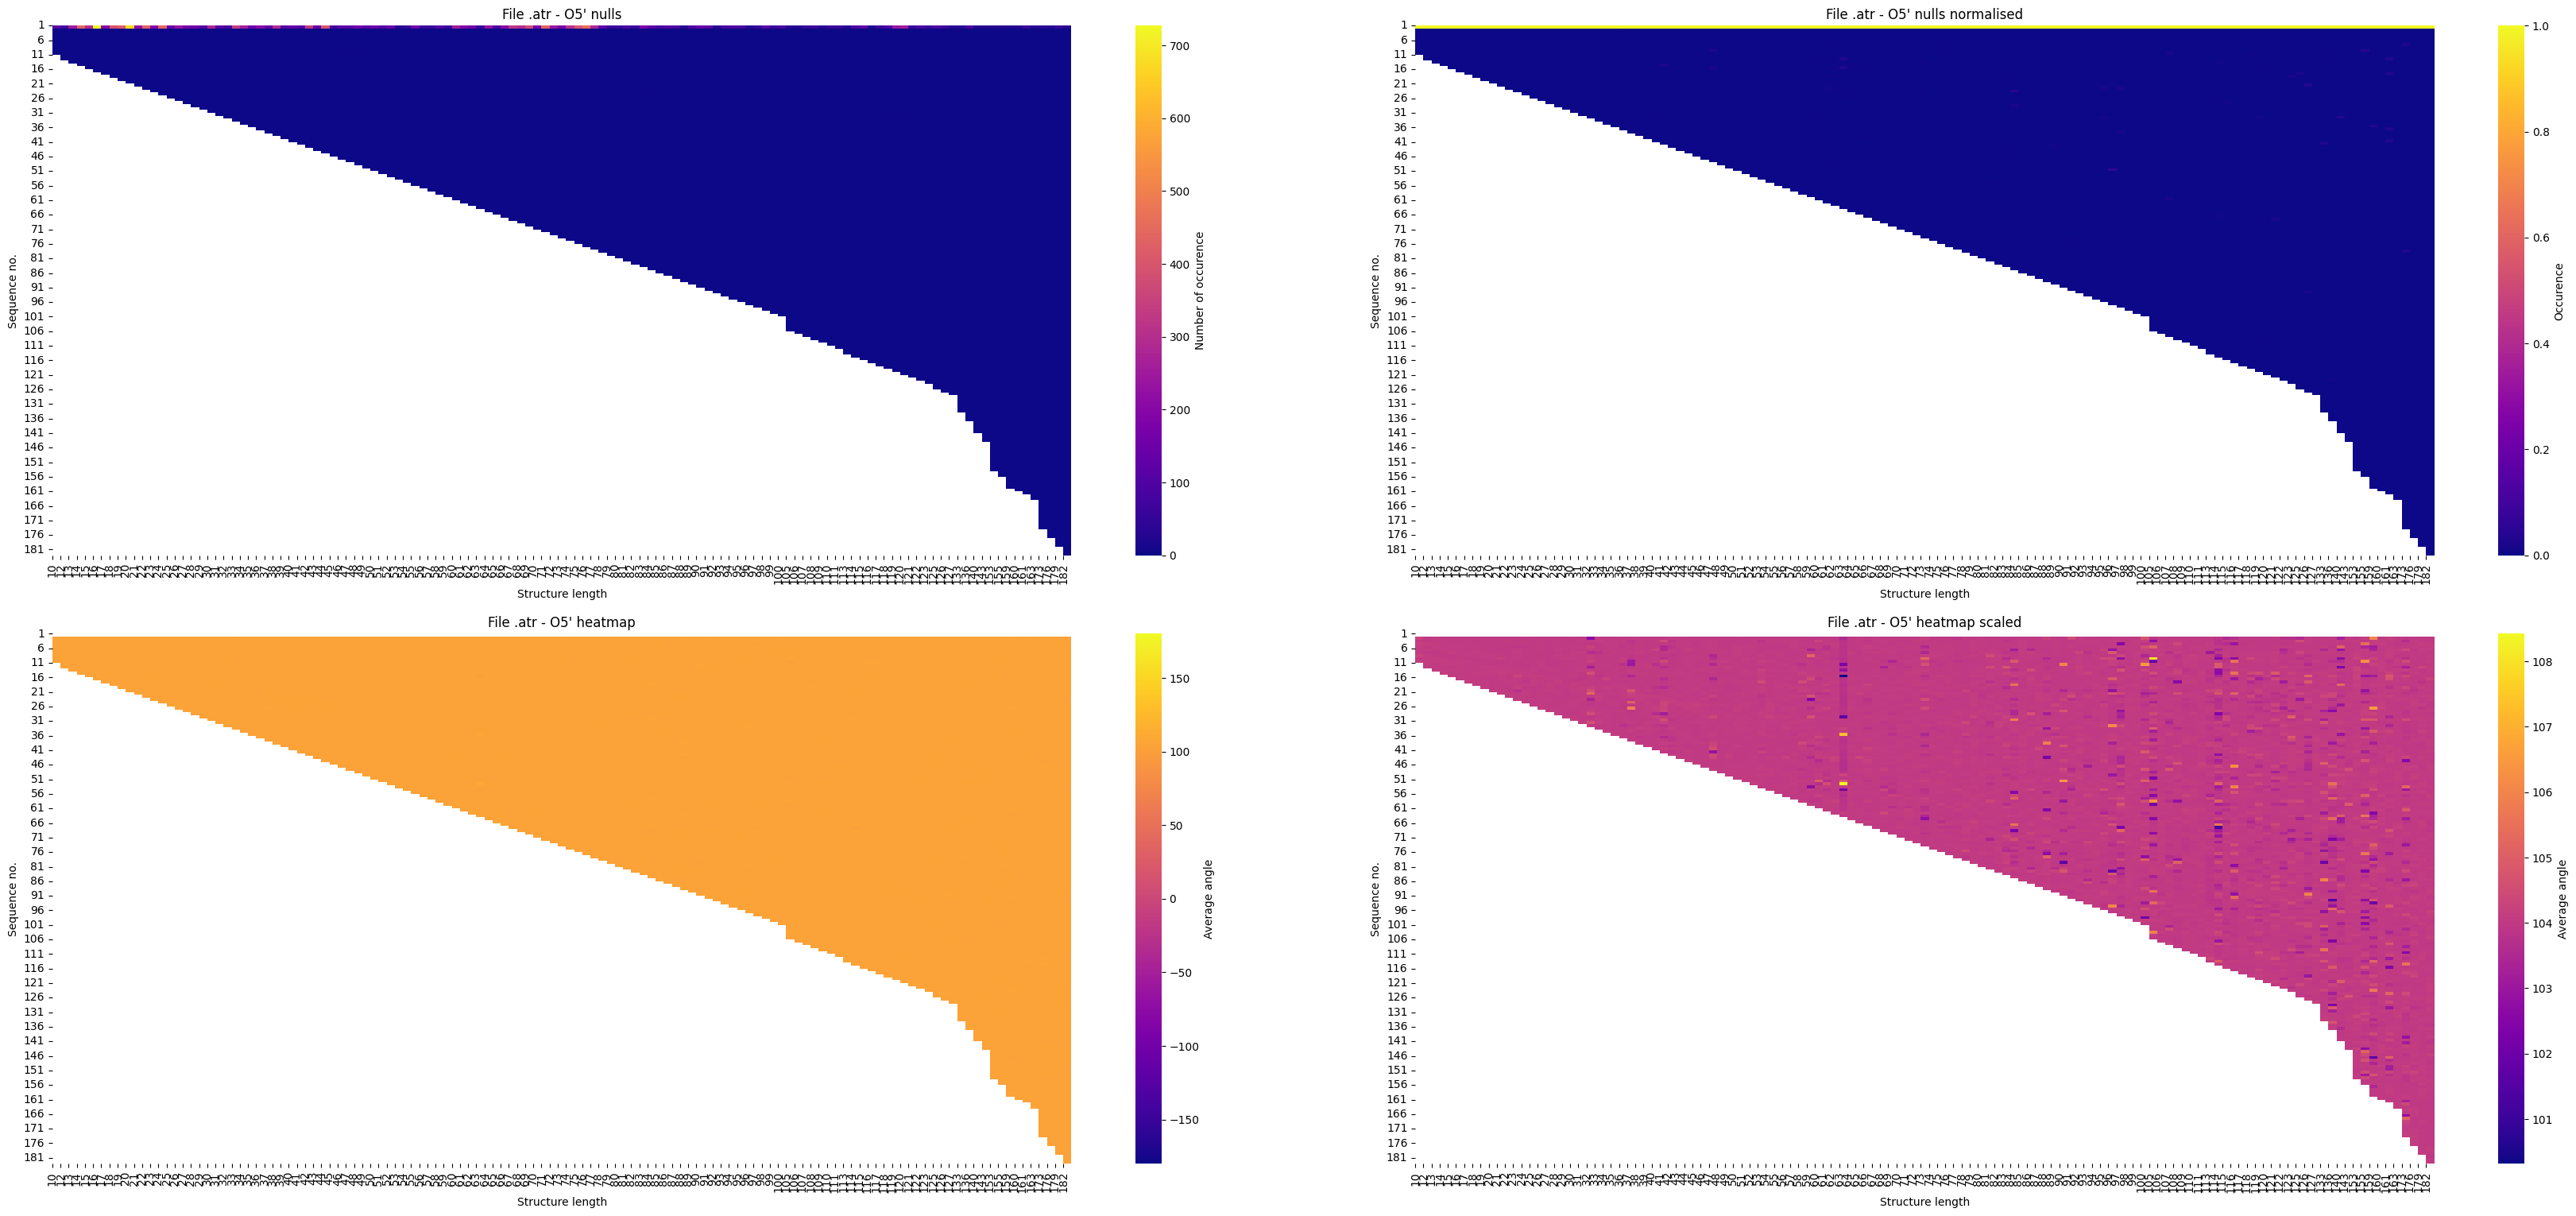

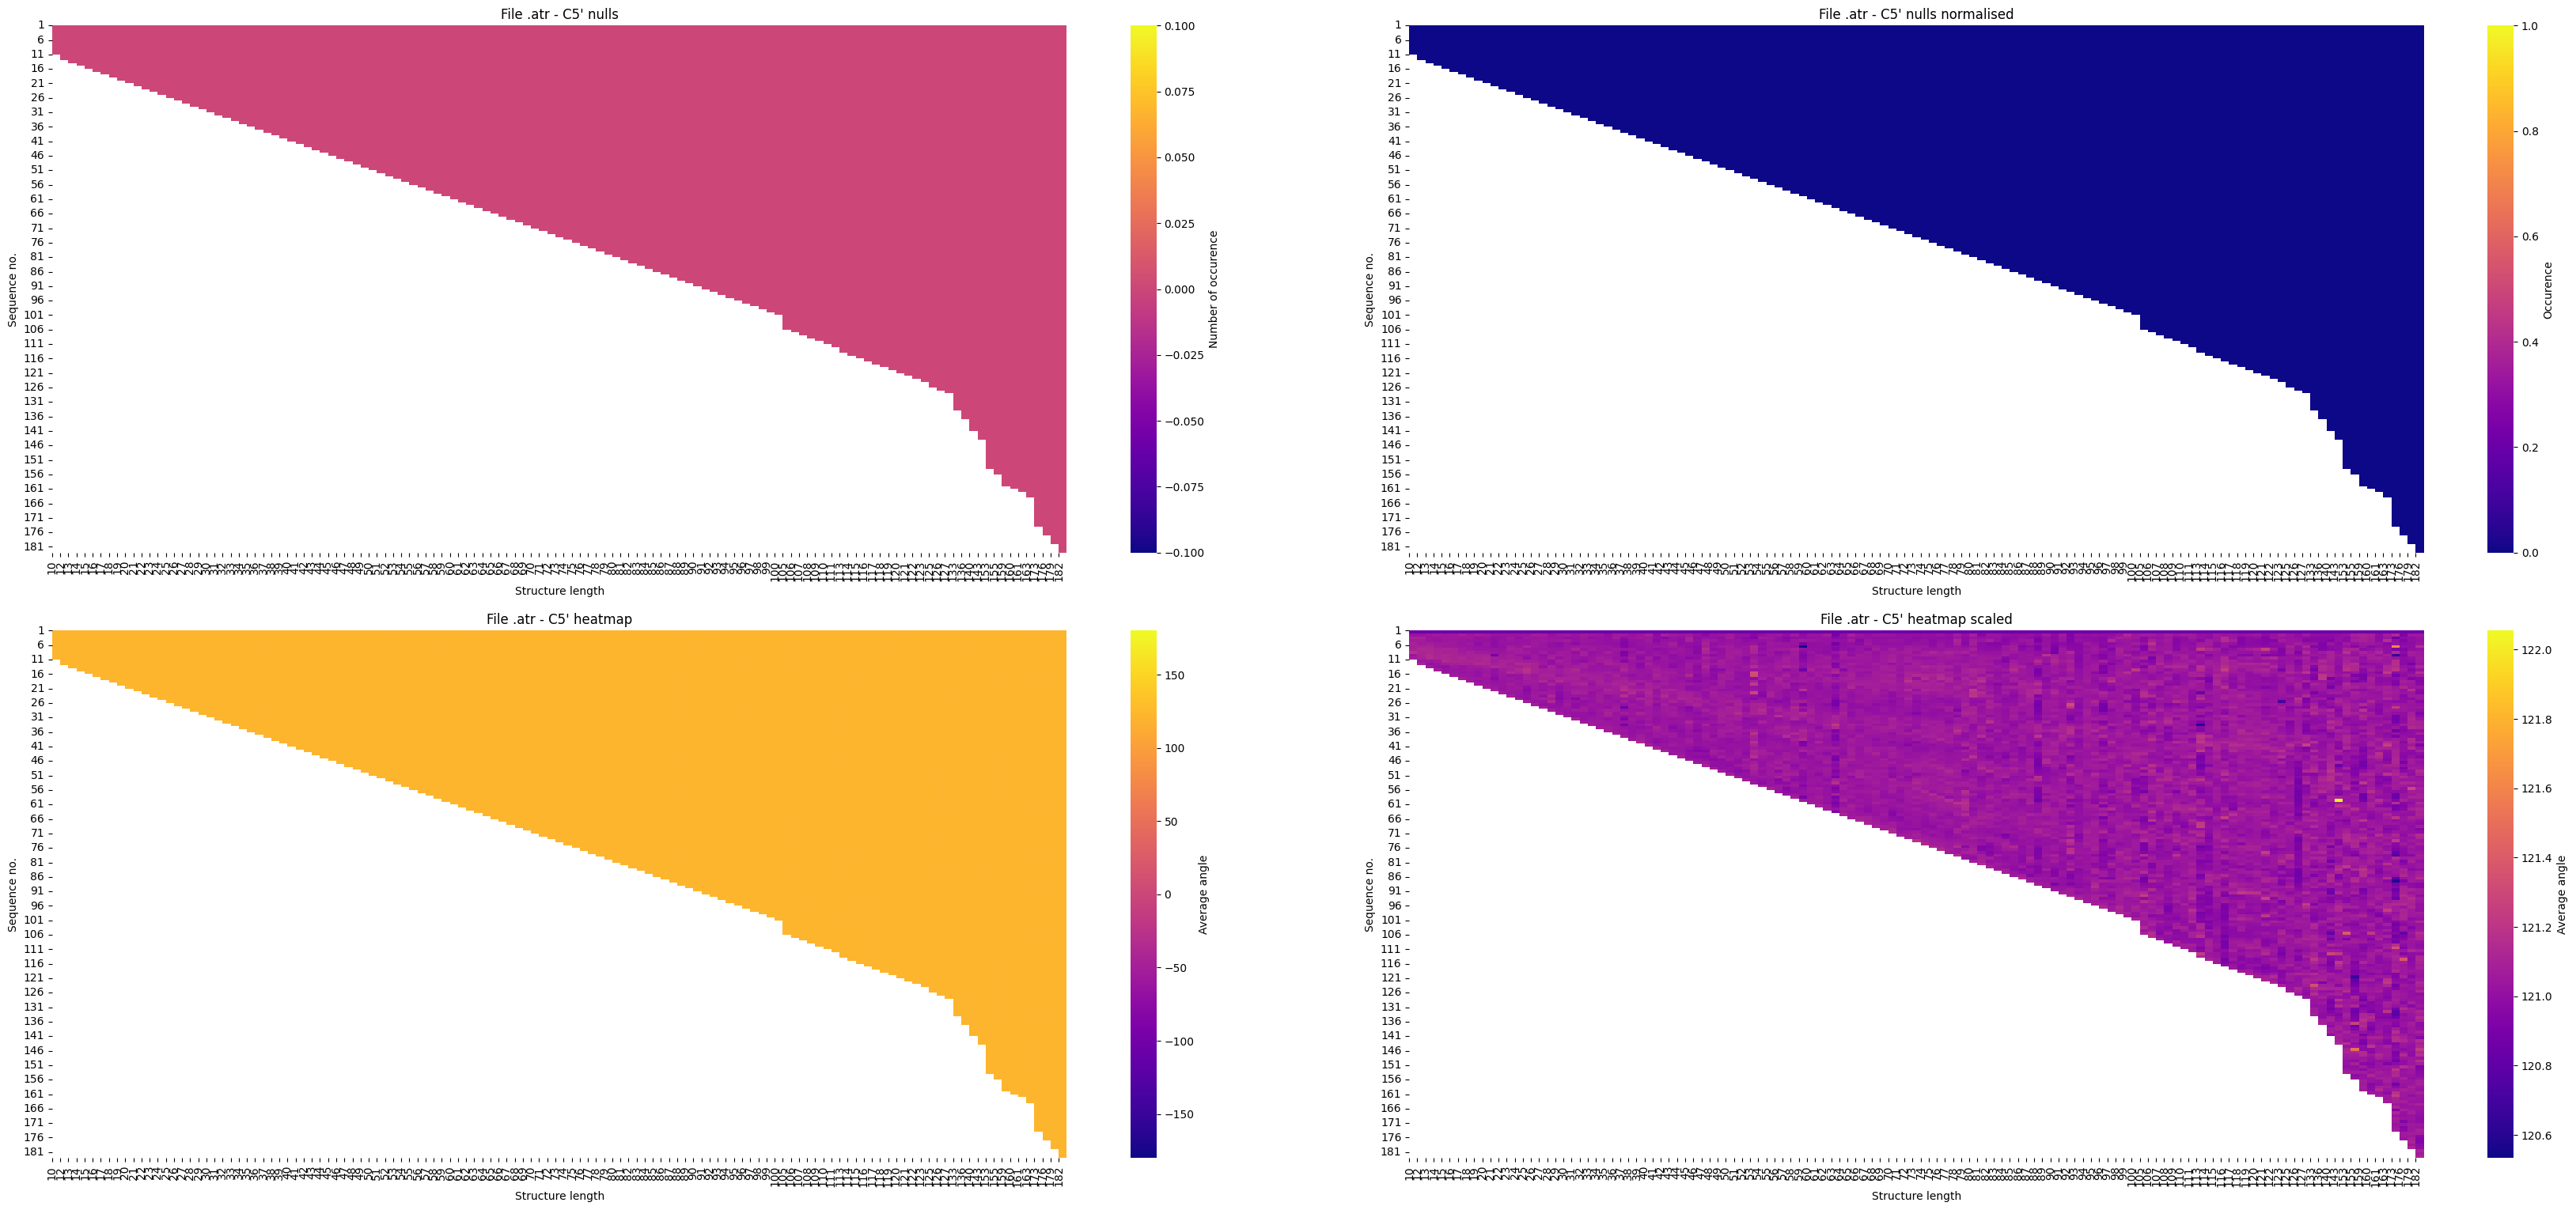

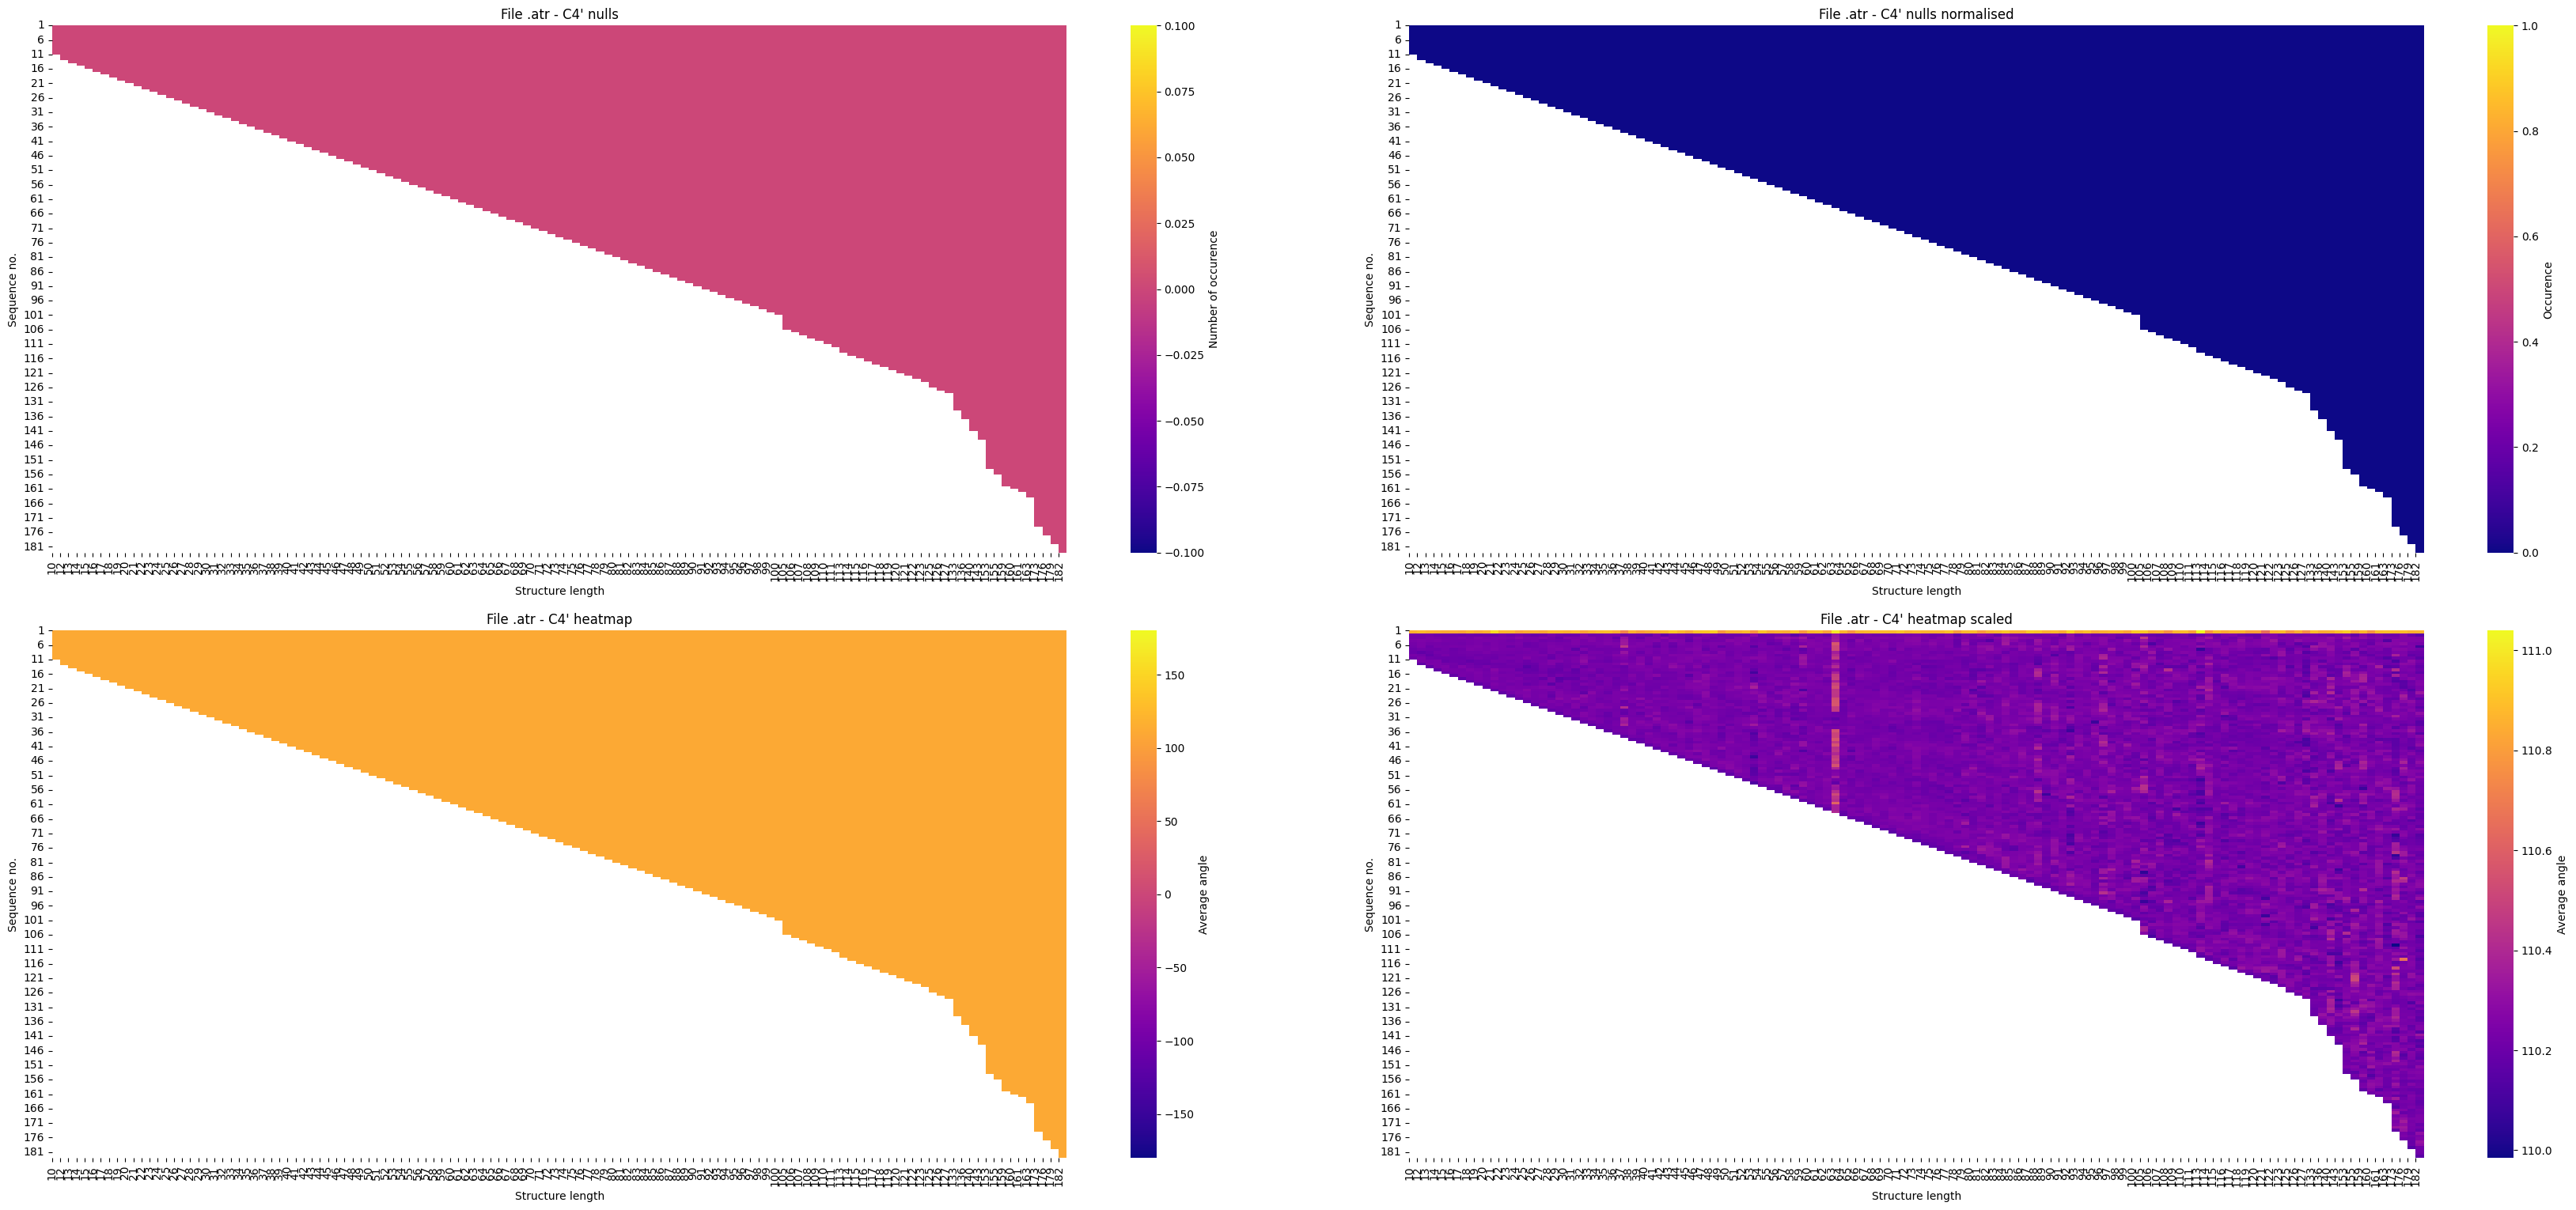

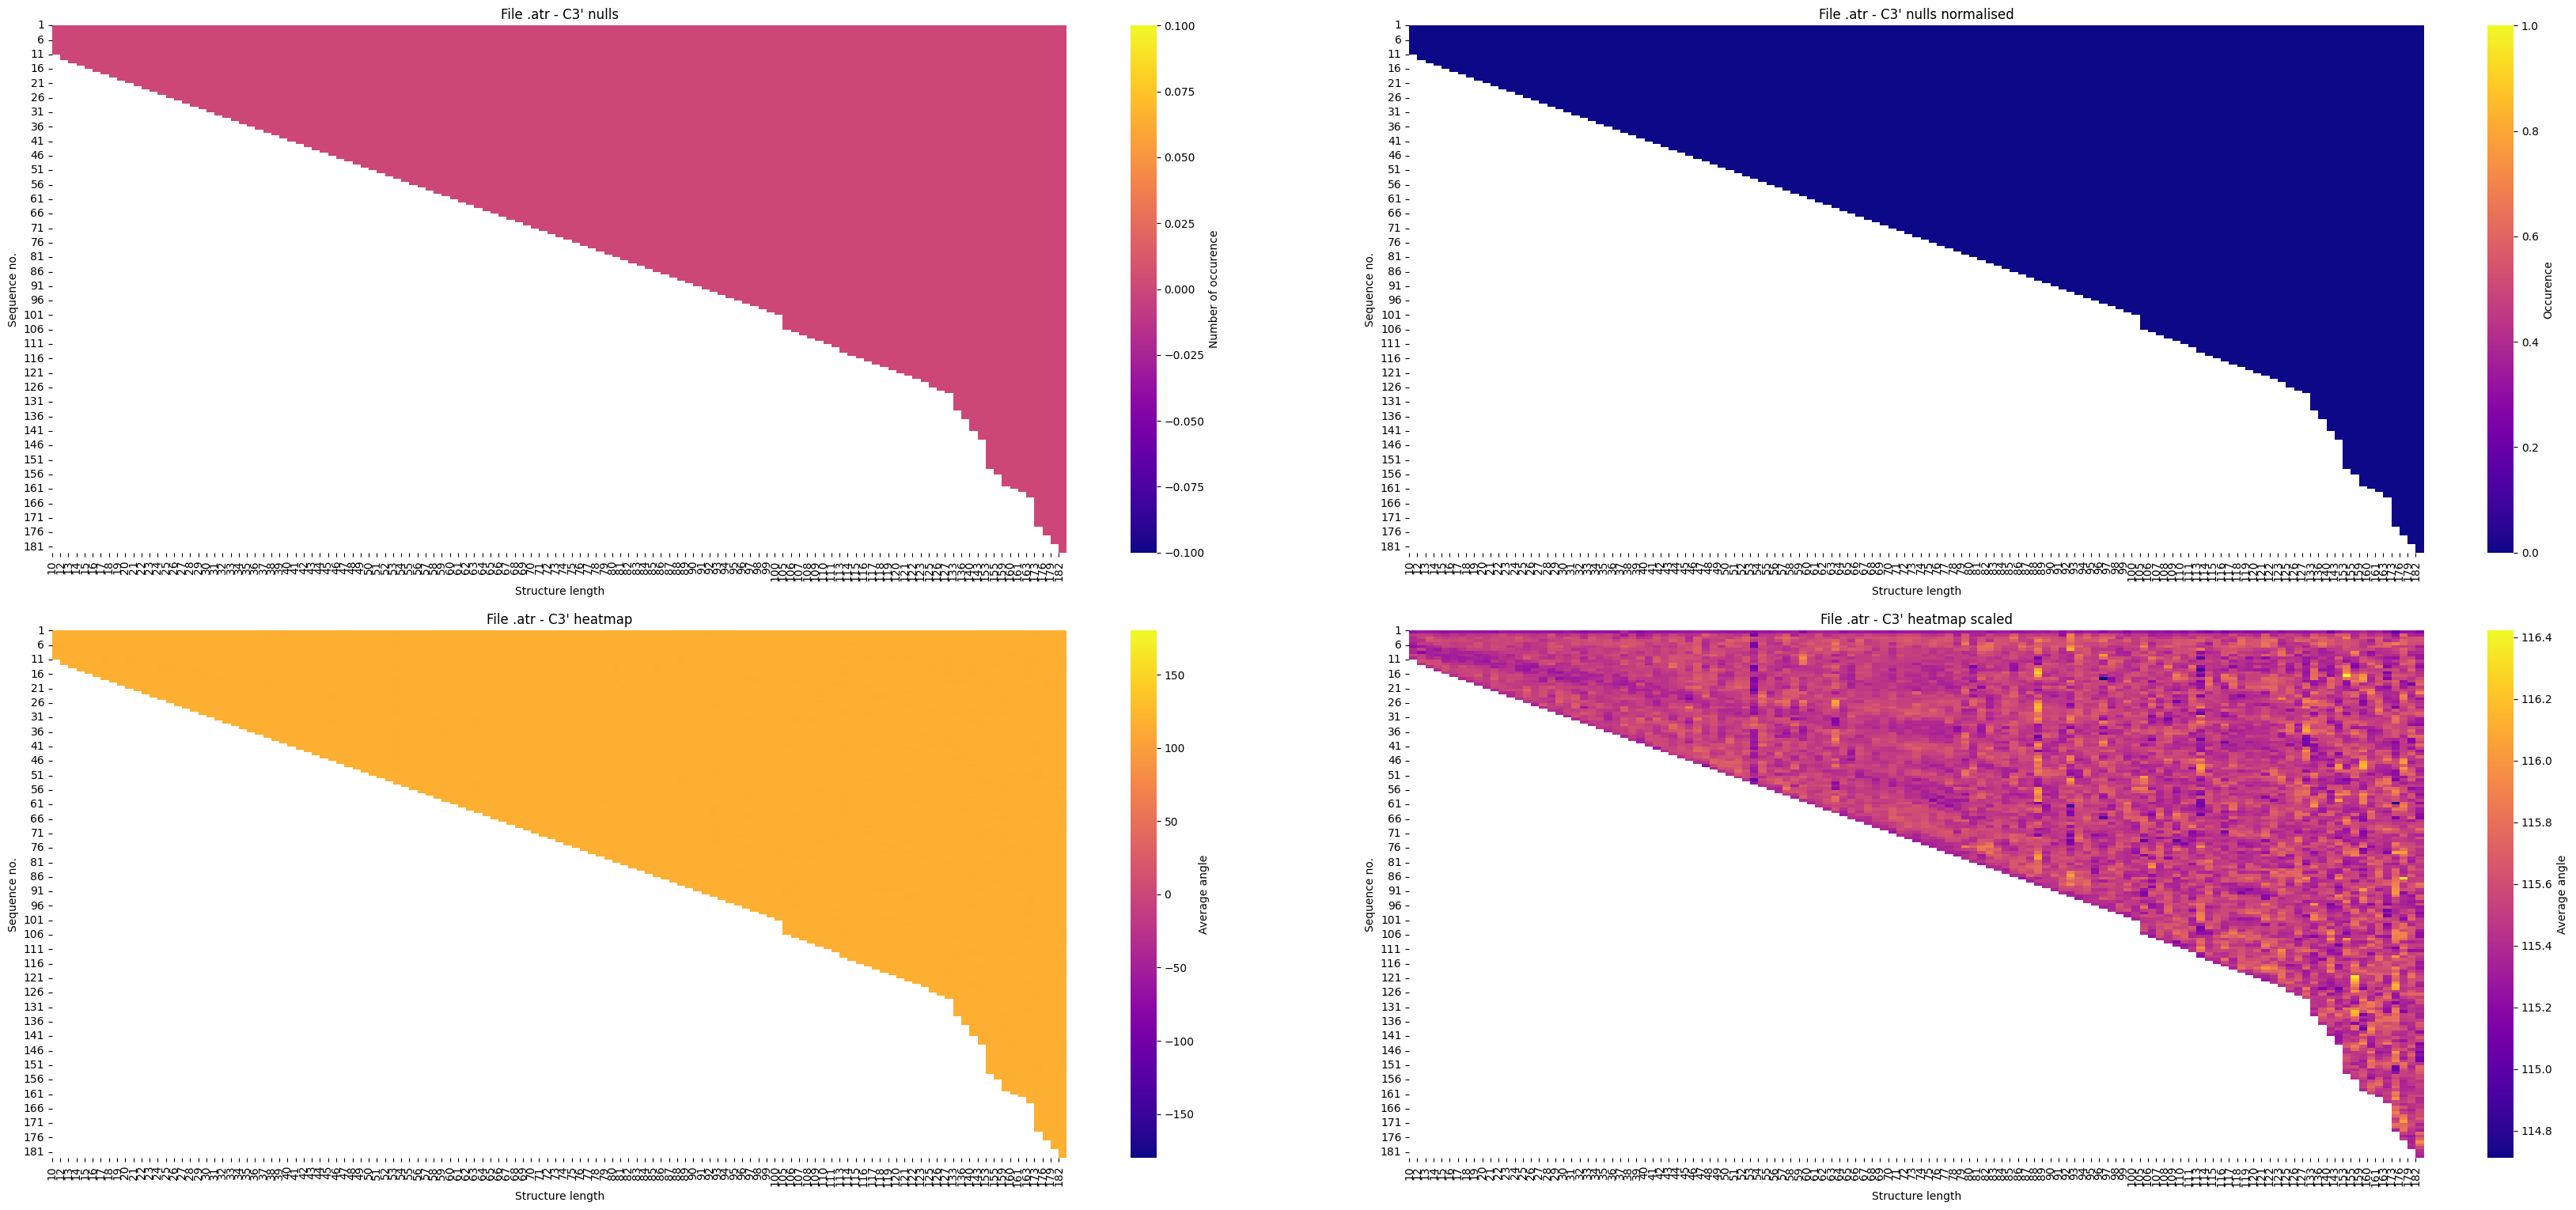

In [17]:
def nan_strlen_analysis(directory: str, ext: str,info,column_labels) -> None:
    structures = [structure for structure in os.listdir(directory) if os.path.isdir(os.path.join(directory, structure))]
    total_structures = len(structures)

    exclude_columns = ['Chain', 'ResNum', 'iCode', 'Name']
    column_labels = column_labels = {'val':[]}

    info = {}

    for struct in tqdm(structures):
        file_path = os.path.join(directory, struct, f'{struct}{ext}')
        if not os.path.exists(file_path): continue

        df = pd.read_csv(file_path, sep='\t',index_col=False)
        df.drop(columns=exclude_columns, inplace=True)
        df.replace('-', np.nan, inplace=True)
        df.fillna(np.nan, inplace=True)

        if len(column_labels['val'])==0:
            column_labels['val'] = df.columns.to_list()
        
        for col in column_labels['val']:
            if col not in info:
                info[col] = dict()
            if df.shape[0] not in info[col]:
                info[col][df.shape[0]]=[{'value':0,'occ':0,'nan':0} for i in range(df.shape[0])]
            for i,value in enumerate(df[col].values):
                if pd.notna(value):
                    info[col][df.shape[0]][i]['value']+=float(value)
                    info[col][df.shape[0]][i]['occ']+=1
                else:
                    info[col][df.shape[0]][i]['nan']+=1

    for col in column_labels['val']:
        fig, axes = plt.subplots(2, 2,figsize=(35, 16))
        fig.tight_layout(pad=5.0)
        plt.title(f"{ext} - {col}")
        temp=([[j['nan'] for j in info[col][i]] for i in sorted(info[col].keys())])
        temp=pd.DataFrame(temp).transpose()
        lab=list(info[col].keys())
        # plt.rc('font', size=25)
        # plt.figure(figsize=(35, 16))
        axes[0,0].set_title(f'File {ext} - {col} nulls')
        sns.heatmap(temp, cmap='plasma',cbar_kws={'label': 'Number of occurence'},ax=axes[0,0]).set_facecolor('#ffffff')
        
        axes[0,0].set_xlabel('Structure length')
        axes[0,0].set_ylabel('Sequence no.')
        axes[0,0].set_xticks(range(0,len(lab))[::],rotation=90, labels=[str(i) for i in sorted(lab)][::])
        axes[0,0].set_yticks(range(0,max(info[col].keys()),5), labels=[str(i) for i in range(1,max(info[col].keys())+1,5)])
        # plt.savefig(f'structures/nan/{ext}-{col}_nans.svg')
        # plt.show()
        
        temp=([[j['nan']/(j['nan']+j['occ']) for j in info[col][i]] for i in sorted(info[col].keys())])
        temp=pd.DataFrame(temp).transpose()
        lab=list(info[col].keys())
        # plt.rc('font', size=25)
        # axes[0,1].figure(figsize=(35, 16))
        axes[0,1].set_title(f'File {ext} - {col} nulls normalised')
        sns.heatmap(temp,vmin=0,vmax=1, cmap='plasma',cbar_kws={'label': 'Occurence'},ax=axes[0,1]).set_facecolor('#ffffff')
        
        axes[0,1].set_xlabel('Structure length')
        axes[0,1].set_ylabel('Sequence no.')
        axes[0,1].set_xticks(range(0,len(lab))[::],rotation=90,labels=[str(i) for i in sorted(lab)][::])
        axes[0,1].set_yticks(range(0,max(info[col].keys()),5), labels=[str(i) for i in range(1,max(info[col].keys())+1,5)])
        # plt.savefig(f'structures/nan_nor/{ext}-{col}_nans.svg')
        # plt.show()
        
        temp=([[j['value']/j['occ'] if j['occ']>0 else np.nan for j in info[col][i] ] for i in sorted(info[col].keys())])
        temp=pd.DataFrame(temp).transpose()
        lab=list(info[col].keys())
        # plt.rc('font', size=25)
        # axes[1,0].figure(figsize=(35, 16))
        axes[1,0].set_title(f'File {ext} - {col} heatmap')
        sns.heatmap(temp,vmin=-180, vmax=180, cmap='plasma',cbar_kws={'label': 'Average angle'},ax=axes[1,0]).set_facecolor('#ffffff')
        
        axes[1,0].set_xlabel('Structure length')
        axes[1,0].set_ylabel('Sequence no.')
        axes[1,0].set_xticks(range(0,len(lab))[::],rotation=90, labels=[str(i) for i in sorted(lab)][::])
        axes[1,0].set_yticks(range(0,max(info[col].keys()),5), labels=[str(i) for i in range(1,max(info[col].keys())+1,5)])
        # plt.savefig(f'structures/full/{ext}-{col}.svg')
        # plt.show()

        # plt.rc('font', size=25)
        # axes[1,1].figure(figsize=(35, 16))
        axes[1,1].set_title(f'File {ext} - {col} heatmap scaled')
        sns.heatmap(temp, cmap='plasma',cbar_kws={'label': 'Average angle'},ax=axes[1,1]).set_facecolor('#ffffff')
        
        axes[1,1].set_xlabel('Structure length', )
        axes[1,1].set_ylabel('Sequence no.')
        axes[1,1].set_xticks(range(0,len(lab))[::],rotation=90, labels=[str(i) for i in sorted(lab)][::])
        axes[1,1].set_yticks(range(0,max(info[col].keys()),5), labels=[str(i) for i in range(1,max(info[col].keys())+1,5)])
        fig.savefig(f'structures/{ext}-{col}.svg')
        plt.show()
        
    
for filetype in file_extensions:
    print(f'### Filetype: {filetype} ###')
    nan_strlen_analysis(dataset_path, filetype,info,column_labels)